# Final assignemt - Statistics
## Reanana Duvdevani and Hila Monsonego

# Imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import scikit_posthocs as sp
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the data

In [47]:
df = pd.read_csv('C:/Users/User/Desktop/עבודות/עבודות של הילה/תיאוריה סטטיסטית/GaltonFamilies.csv')

In [49]:
df.head()

rownames family  father  mother  midparentHeight  children  childNum  \
0         1    001    78.5    67.0            75.43         4         1   
1         2    001    78.5    67.0            75.43         4         2   
2         3    001    78.5    67.0            75.43         4         3   
3         4    001    78.5    67.0            75.43         4         4   
4         5    002    75.5    66.5            73.66         4         1   

   gender  childHeight  
0    male         73.2  
1  female         69.2  
2  female         69.0  
3  female         69.0  
4    male         73.5

In [55]:
#corrections
correct_df = df
correct_df.replace("male", 1, inplace=True)
correct_df.replace("female", 0, inplace=True)
for i in range(136, 205):
    correct_df.replace(str(i), i+1, inplace=True)
correct_df.replace("136A", 136, inplace=True)
for i in range(0, 609):
    correct_df.replace(correct_df["family"].iloc[i], int(
        correct_df["family"].iloc[i]), inplace=True)

In [57]:
correct_df

rownames  family  father  mother  midparentHeight  children  childNum  \
0           1       1    78.5    67.0            75.43         4         1   
1           2       1    78.5    67.0            75.43         4         2   
2           3       1    78.5    67.0            75.43         4         3   
3           4       1    78.5    67.0            75.43         4         4   
4           5       2    75.5    66.5            73.66         4         1   
..        ...     ...     ...     ...              ...       ...       ...   
929       930     204    62.0    66.0            66.64         3         1   
930       931     204    62.0    66.0            66.64         3         2   
931       932     204    62.0    66.0            66.64         3         3   
932       933     205    62.5    63.0            65.27         2         1   
933       934     205    62.5    63.0            65.27         2         2   

     gender  childHeight  
0         1         73.2  
1         0         69.2  
2         0         69.0  
3         0         69.0  
4         1         73.5  
..      ...          ...  
929       1         64.0  
930       0         62.0  
931       0         61.0  
932       1         66.5  
933       0         57.0  

[934 rows x 9 columns]

In [59]:
df=correct_df

### Data frame of the families representatives

In [61]:
representatives_df=df[df["childNum"]==1]

# Exploring the data

## Distributions

In [63]:
def check_normality(data, threshold=30):
    """
    Perform a normality test using the Shapiro-Wilk test for small samples
    and the Kolmogorov-Smirnov test for larger samples.

    Parameters:
    data (list or array-like): The sample data to test for normality.
    threshold (int): The sample size threshold to switch between tests. Default is 30.

    Returns:
    test_name (str): The name of the test performed.
    statistic (float): The test statistic.
    p_value (float): The p-value of the test.
    """

    n = len(data)

    if n <= threshold:
        test_name = "Shapiro-Wilk"
        statistic, p_value = stats.shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        statistic, p_value = stats.kstest(
            data, 'norm', args=(np.mean(data), np.std(data)))

    print("p value:%.4f" % p_value)
    if p_value < 0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

### Number of children in family distribution

p value:0.0004
Reject null hypothesis >> The data is not normally distributed


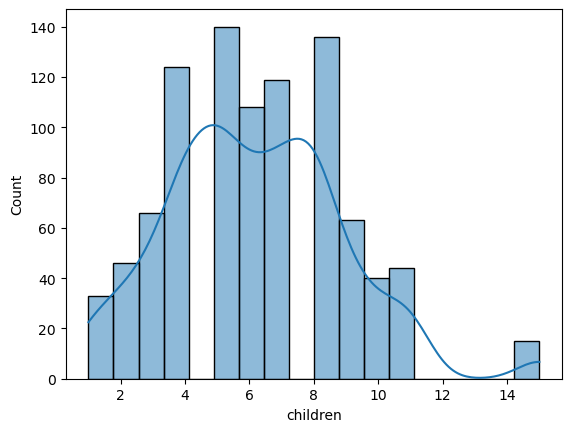

In [65]:
sns.histplot(df,
               x = "children",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"]))

### Children height distribution

p value:0.0004
Reject null hypothesis >> The data is not normally distributed


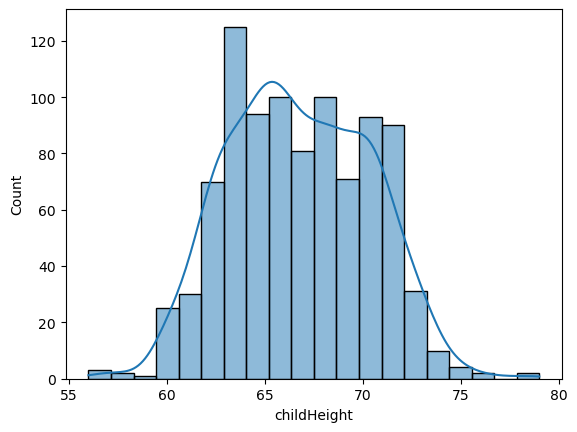

In [67]:
sns.histplot(df,
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"]))

### Boys (children) height distribution

p value:0.0013
Reject null hypothesis >> The data is not normally distributed


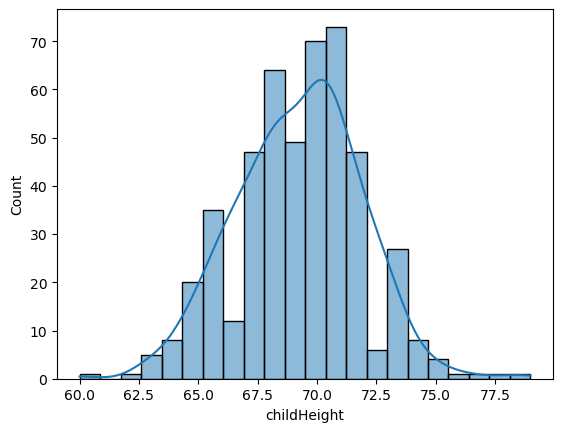

In [73]:
sns.histplot(df[df["gender"]==1],
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"])[np.where(np.array(df["gender"])==1)])

### Girls (children) height distribution

p value:0.0718
Fail to reject null hypothesis >> The data is normally distributed


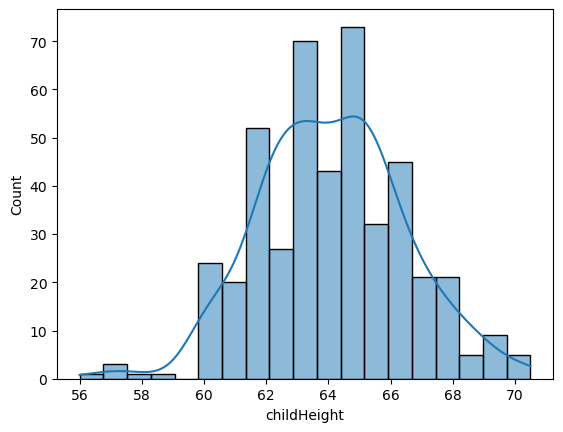

In [75]:
sns.histplot(df[df["gender"]==0],
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"])[np.where(np.array(df["gender"])==0)])

### Fathers height distribution

p value:0.0995
Fail to reject null hypothesis >> The data is normally distributed


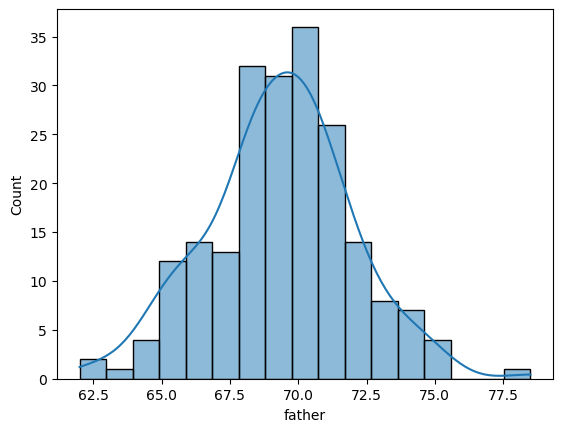

In [77]:
sns.histplot(representatives_df,
               x = "father",
               stat = 'count',
               kde = True)
check_normality(np.array(representatives_df["father"]))

### Mothers height distribution

p value:0.1001
Fail to reject null hypothesis >> The data is normally distributed


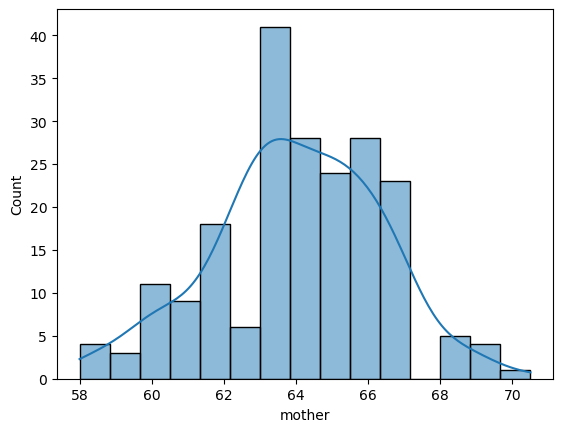

In [79]:
sns.histplot(representatives_df,
               x = "mother",
               stat = 'count',
               kde = True)
check_normality(np.array(representatives_df["mother"]))

### Galton MidParent height distribution

p value:0.8319
Fail to reject null hypothesis >> The data is normally distributed


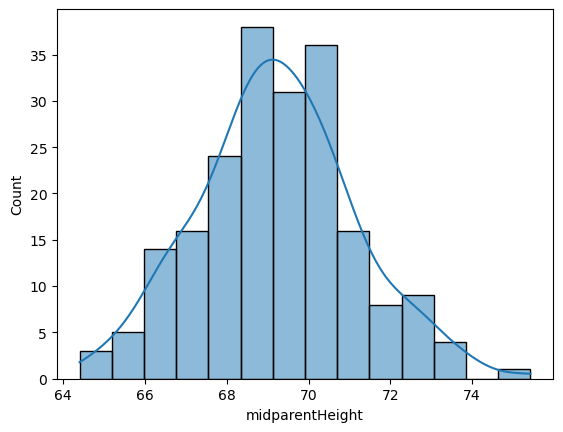

In [81]:
sns.histplot(representatives_df,
               x = "midparentHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(representatives_df["midparentHeight"]))

## Comparison tests

### Comparing the heights of the children in relation to the height of their fathers: is there a connection between the height of the child and the fact that the height of his father is above or under the average

In [83]:
fathers=np.array(representatives_df["father"])
fathers_mean=np.mean(fathers)
children=np.array(representatives_df["childHeight"])
children_mean=np.mean(children)

# Check normality
children_who_their_father_is_under_the_average=np.array(df[df["father"]<fathers_mean]["childHeight"])
print(check_normality(children_who_their_father_is_under_the_average))
children_who_their_father_is_above_the_average=np.array(df[df["father"]>=fathers_mean]["childHeight"])
print(check_normality(children_who_their_father_is_above_the_average))

p value:0.0358
Reject null hypothesis >> The data is not normally distributed
None
p value:0.0081
Reject null hypothesis >> The data is not normally distributed
None


In [85]:
# Check variance homogeneity
test_stat, p_val = stats.levene(children_who_their_father_is_under_the_average, children_who_their_father_is_above_the_average)
print("p value:%.4f" % p_val)
if p_val <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.3882
Fail to reject null hypothesis >> The variances of the samples are same.


In [87]:
# Fix the groups to be at the same shape in order to implement the wilcoxon test
children_who_their_father_is_under_the_average=children_who_their_father_is_under_the_average[:450]

In [89]:
# Calculate medians
print(np.median(children_who_their_father_is_under_the_average))
print(np.median(children_who_their_father_is_above_the_average))

66.0
67.5


In [91]:
# Compare medians using wilcoxon
test,pvalue = stats.wilcoxon(children_who_their_father_is_under_the_average, children_who_their_father_is_above_the_average, alternative="less")
if pvalue <0.05:
    print("Reject null hypothesis: the median of the children who their father is under the average height is less than the median of the children who their father is above the average height")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis: the median of the children who their father is under the average height is less than the median of the children who their father is above the average height


### Comparing the heights of the children in relation to the height of their mothers: is there a connection between the height of the child and the fact that the height of his mother is above or under the average

In [94]:
mothers=np.array(representatives_df["mother"])
mothers_mean=np.mean(mothers)
children=np.array(representatives_df["childHeight"])
children_mean=np.mean(children)

# Check normality
children_who_their_mother_is_under_the_average=np.array(df[df["mother"]<mothers_mean]["childHeight"])
print(check_normality(children_who_their_mother_is_under_the_average))
children_who_their_mother_is_above_the_average=np.array(df[df["mother"]>=mothers_mean]["childHeight"])
print(check_normality(children_who_their_mother_is_above_the_average))

p value:0.0126
Reject null hypothesis >> The data is not normally distributed
None
p value:0.0151
Reject null hypothesis >> The data is not normally distributed
None


In [96]:
# Check variance homogeneity using Levene test
test_stat, p_val = stats.levene(children_who_their_mother_is_under_the_average, children_who_their_mother_is_above_the_average)
print("p value:%.4f" % p_val)
if p_val <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0020
Reject null hypothesis >> The variances of the samples are different.


In [98]:
# Fix the groups to be at the same shape in order to implement the wilcoxon test
children_who_their_mother_is_under_the_average=children_who_their_mother_is_under_the_average[:443]

In [100]:
# Calculate medians
print(np.median(children_who_their_mother_is_under_the_average))
print(np.median(children_who_their_mother_is_above_the_average))

66.5
67.0


In [102]:
# Compare medians using wilcoxon
test,pvalue = stats.wilcoxon(children_who_their_father_is_under_the_average, children_who_their_father_is_above_the_average, alternative="less")
if pvalue <0.05:
    print("Reject null hypothesis: the median of the children who their mother is under the average height is less than the median of the children who their mother is above the average height")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis: the median of the children who their mother is under the average height is less than the median of the children who their mother is above the average height


### Divide the children according to their number 

In [104]:
sorted_df=df.sort_values("childNum")

In [106]:
groups=[]
current_group=[]
child_num=1
for i in range(sorted_df.shape[0]):
    if sorted_df["childNum"].iloc[i] == child_num:
        current_group.append(sorted_df["childHeight"].iloc[i])
    else:
        groups.append(current_group)
        child_num+=1
        current_group=[]
        current_group.append(sorted_df["childHeight"].iloc[i])
groups.append(current_group) 

p value:0.0007
Reject null hypothesis >> The data is not normally distributed


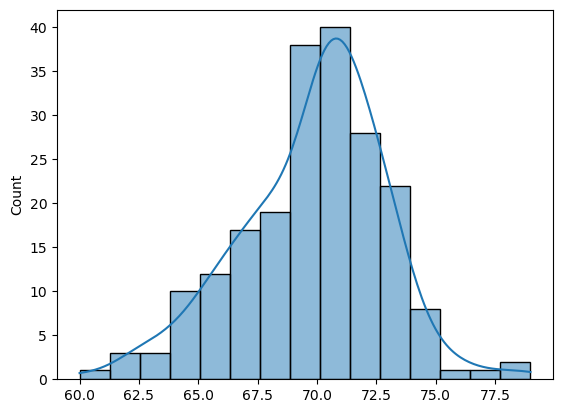

p value:0.0212
Reject null hypothesis >> The data is not normally distributed


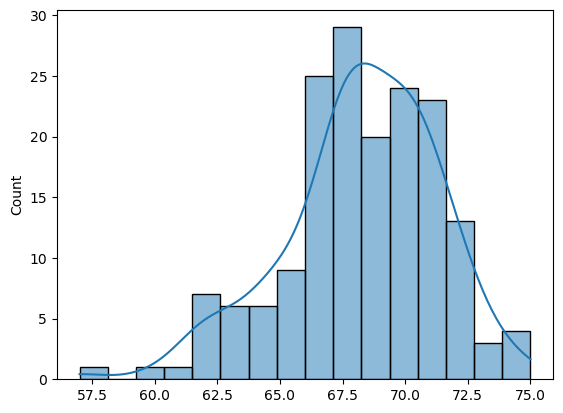

p value:0.1825
Fail to reject null hypothesis >> The data is normally distributed


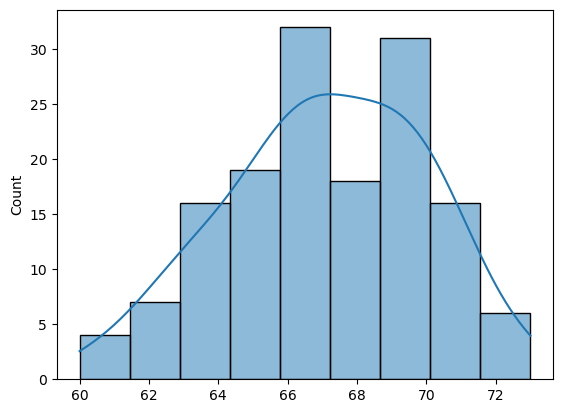

p value:0.0903
Fail to reject null hypothesis >> The data is normally distributed


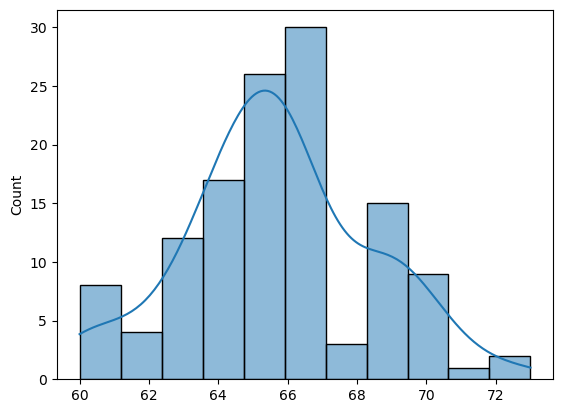

p value:0.5393
Fail to reject null hypothesis >> The data is normally distributed


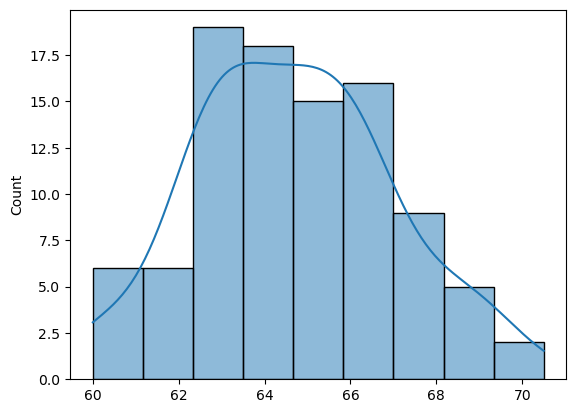

p value:0.3802
Fail to reject null hypothesis >> The data is normally distributed


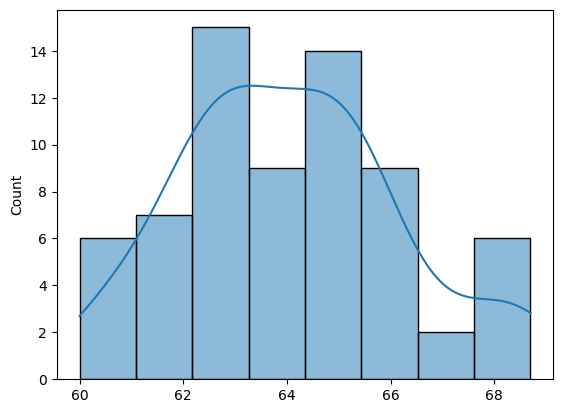

p value:0.9362
Fail to reject null hypothesis >> The data is normally distributed


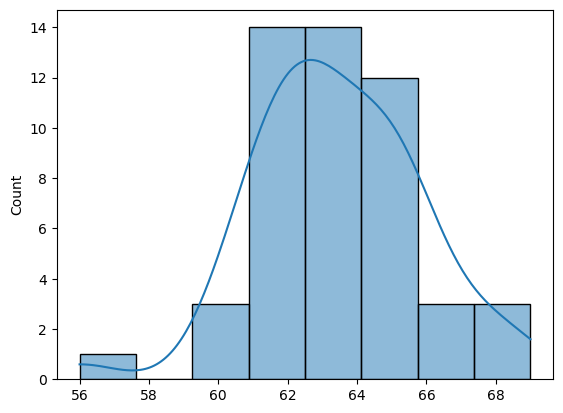

p value:0.4562
Fail to reject null hypothesis >> The data is normally distributed


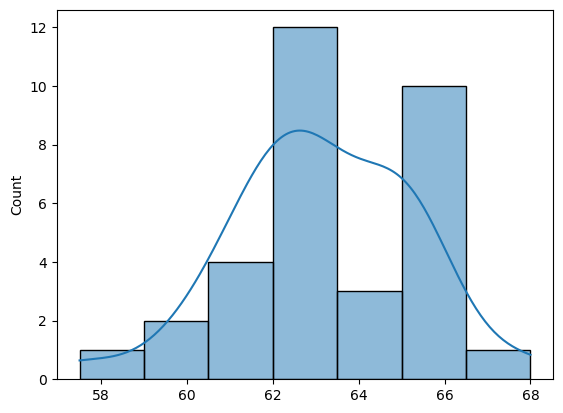

p value:0.3356
Fail to reject null hypothesis >> The data is normally distributed


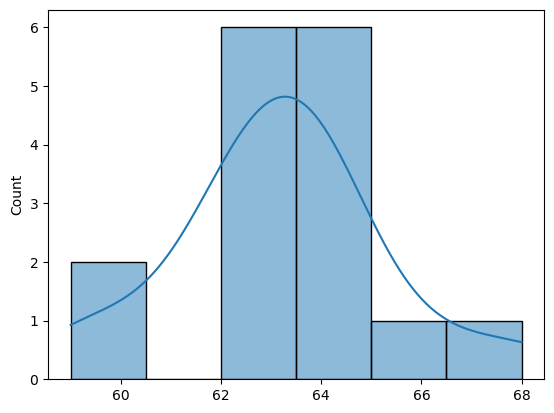

p value:0.5927
Fail to reject null hypothesis >> The data is normally distributed


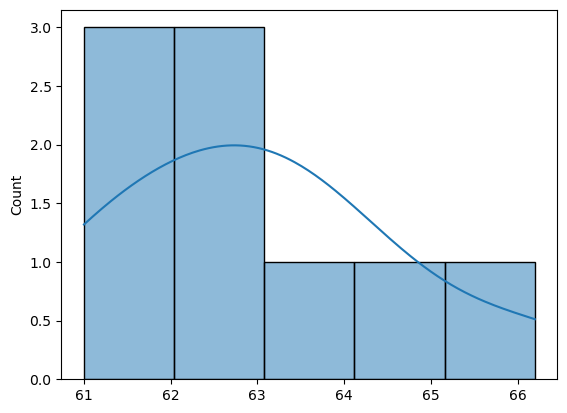

p value:0.3842
Fail to reject null hypothesis >> The data is normally distributed


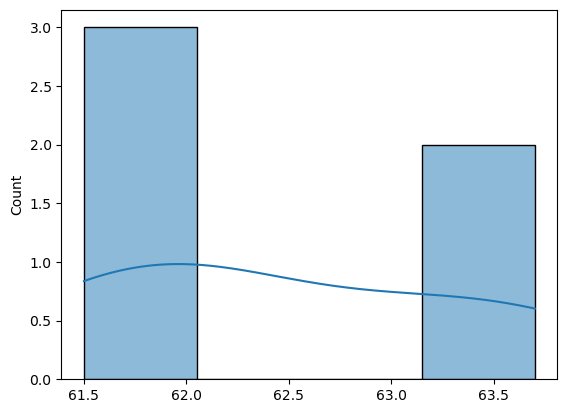

In [108]:
for num in range(11):
    group=groups[num]
    sns.histplot(group,stat = 'count', kde = True)
    check_normality(group)
    plt.show()

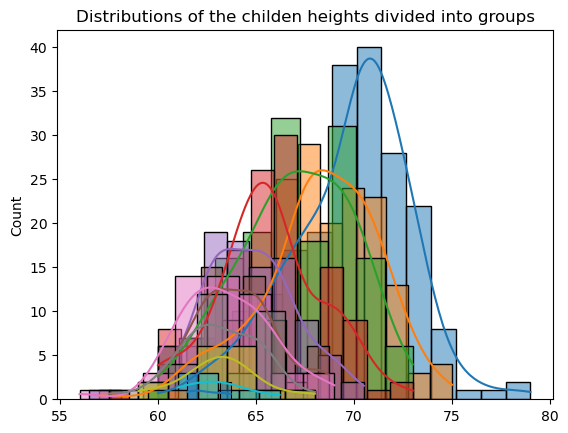

In [110]:
plt.title("Distributions of the childen heights divided into groups")
for group in groups:
    sns.histplot(group,stat = 'count', kde = True)

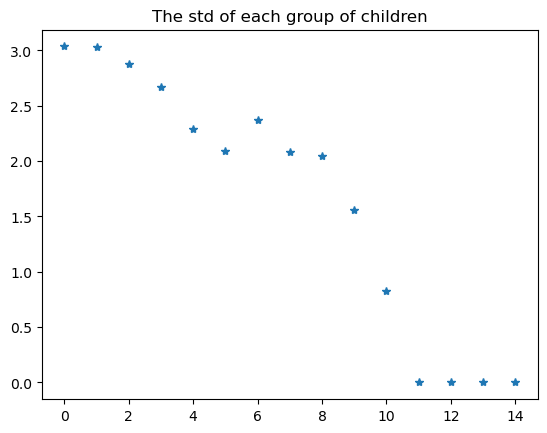

In [112]:
stds=[]
for group in groups:
    stds.append(np.std(group))
    plt.title("The std of each group of children")
plt.plot(stds,"*") 

In [114]:
# Check variance homogeneity using Levene test
stat, pvalue_levene= stats.levene(groups[0],groups[1],groups[2],groups[3],groups[4],groups[5],groups[6],groups[7],groups[8],groups[9],groups[10],
                                  groups[11])

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0028
Reject null hypothesis >> The variances of the samples are different.


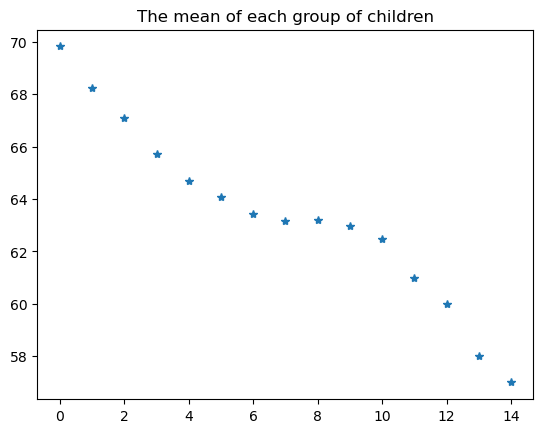

In [116]:
means=[]
for group in groups:
    means.append(np.mean(group))
plt.title("The mean of each group of children")    
plt.plot(means,"*") 

## Corelation matrices

### Pearson corelations matrix for the numerical variables

In [120]:
numerical_df=df[["father","mother","midparentHeight","childHeight"]]

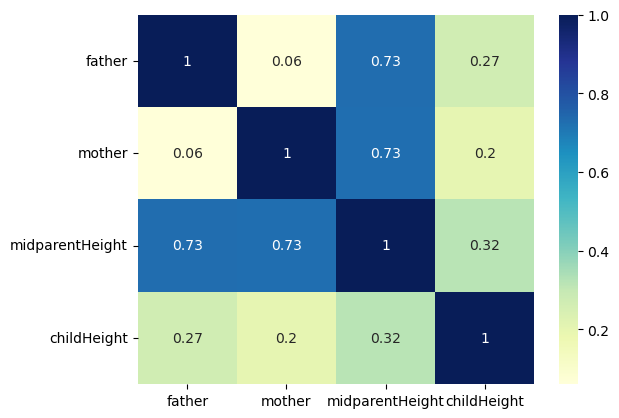

In [122]:
dataplot = sns.heatmap(numerical_df.corr(), cmap="YlGnBu", annot=True) 

In [124]:
# p_values calculation
corr_coefficient, p_value = stats.pearsonr(np.array(numerical_df["childHeight"]),np.array(numerical_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(numerical_df["childHeight"]),np.array(numerical_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(numerical_df["childHeight"]),np.array(numerical_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.26603853892271967 --> with p_value:  1.3498077148869741e-16
child height and mother height correlation:  0.20132194862209996 --> with p_value:  5.362412018228277e-10
child height and midparent height correlation:  0.3209498960639596 --> with p_value:  8.05386499247872e-24


### Spearman correlations matrix for the categorial variables

In [127]:
categorial_df=df[["gender","childHeight"]]

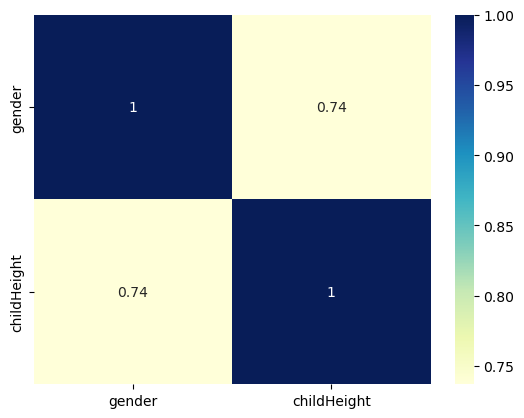

In [129]:
dataplot = sns.heatmap(categorial_df.corr("spearman"), cmap="YlGnBu", annot=True) 

In [131]:
# p_values calculation
corr_coefficient, p_value = stats.spearmanr(np.array(categorial_df["childHeight"]),np.array(categorial_df["gender"] ))
print("child height and gender correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and gender correlation:  0.7370167452367875 --> with p_value:  9.64733265650843e-161


### Pearson matrix for the girls (children)

In [133]:
girls_df=df[df["gender"]==0]

In [135]:
girls_numerical_df=girls_df[["father","mother","midparentHeight","childHeight"]]

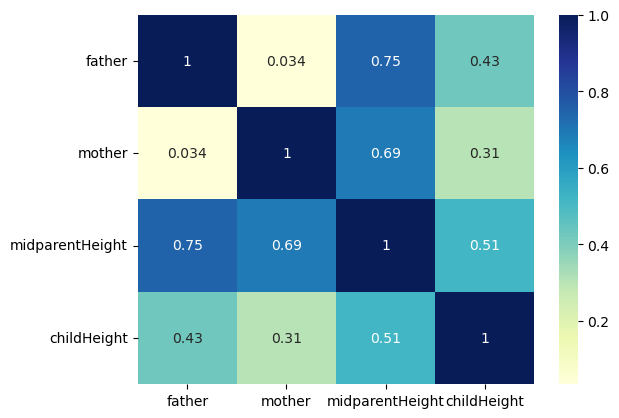

In [137]:
dataplot = sns.heatmap(girls_numerical_df.corr(), cmap="YlGnBu", annot=True) 

In [139]:
# p_values calculation
corr_coefficient, p_value = stats.pearsonr(np.array(girls_numerical_df["childHeight"]),np.array(girls_numerical_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(girls_numerical_df["childHeight"]),np.array(girls_numerical_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(girls_numerical_df["childHeight"]),np.array(girls_numerical_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.42843297684634896 --> with p_value:  1.1970408643547386e-21
child height and mother height correlation:  0.3051644513268953 --> with p_value:  3.2218315248985794e-11
child height and midparent height correlation:  0.51327251718791 --> with p_value:  8.23952706205857e-32


### Pearson matrix for the boys

In [141]:
boys_df=df[df["gender"]==1]

In [143]:
boys_numerical_df=boys_df[["father","mother","midparentHeight","childHeight"]]

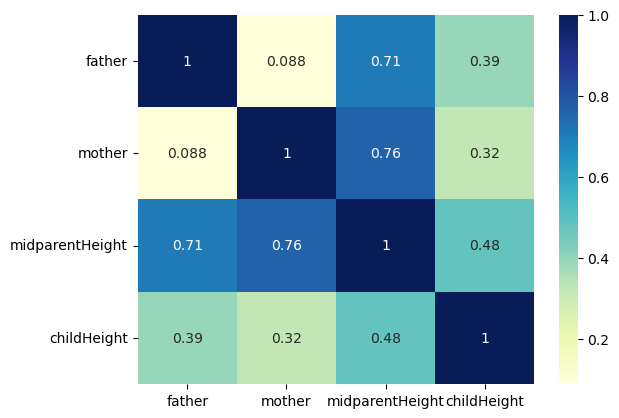

In [145]:
dataplot = sns.heatmap(boys_numerical_df.corr(), cmap="YlGnBu", annot=True) 

In [147]:
# p_values calculation
corr_coefficient, p_value = stats.pearsonr(np.array(boys_numerical_df["childHeight"]),np.array(boys_numerical_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(boys_numerical_df["childHeight"]),np.array(boys_numerical_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(boys_numerical_df["childHeight"]),np.array(boys_numerical_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.3923834966628357 --> with p_value:  3.737108856194152e-19
child height and mother height correlation:  0.3230049836849058 --> with p_value:  3.837934605721925e-13
child height and midparent height correlation:  0.48275279903014195 --> with p_value:  1.8904769740291211e-29


# Regression models: predict children height

### Classic average height of parents (50-50) as an input, in addition to gender

In [151]:
# relevant data-frame columns
parents_average=(np.array(df["father"])+np.array(df["mother"]))/2
gender=np.array(df["gender"])
childheight=np.array(df["childHeight"])

In [153]:
# Normalize
max_parents_average=max(parents_average)
min_parents_average=min(parents_average)
normalized_parents_average=(parents_average-min_parents_average)/(max_parents_average-min_parents_average)

max_childheight=max(childheight)
min_childheight=min(childheight)
normalized_childheight=(childheight-min_childheight)/(max_childheight-min_childheight)

In [155]:
# Create X, Y arrays
X=np.concatenate((np.reshape(normalized_parents_average,(934,1)),np.reshape(gender,(934,1))),axis=1)
Y=normalized_childheight

In [351]:
# Split to train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [352]:
# train the model
# This callback will stop the training when there is no improvement in
# loss for 3 consecutive epochs
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = tf.keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=10000, validation_data=(X_test,Y_test), callbacks=[callback])

Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)                    │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3018 - val_loss: 0.2825
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2726 - val_loss: 0.2410
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2287 - val_loss: 0.2049
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1923 - val_loss: 0.1730
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1610 - val_loss: 0.1453
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1237 - val_loss: 0.1217
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1179 - val_loss: 0.1008
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0904 - val_loss: 0.0837
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0791 - val_loss: 0.0690
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0607 - val_loss: 0.0572
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0541 - val_loss: 0.0470
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

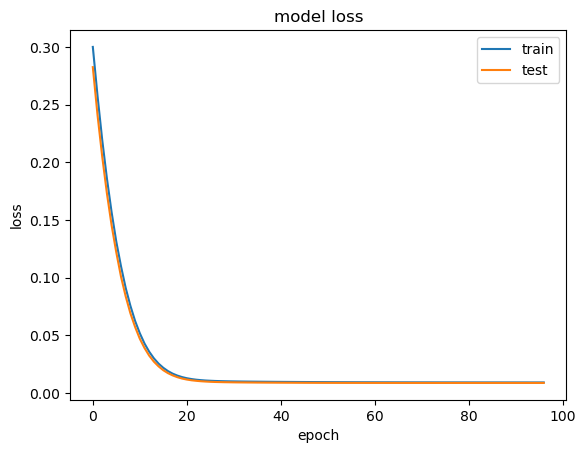

In [353]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


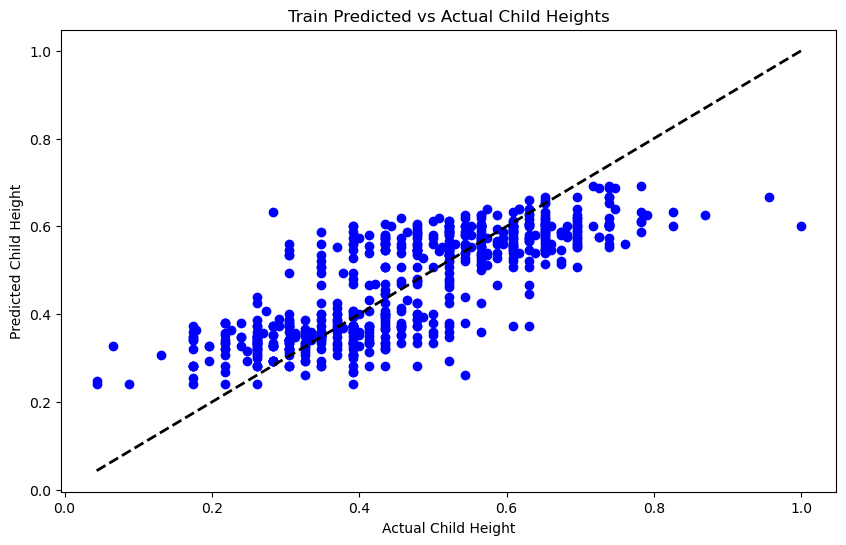

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


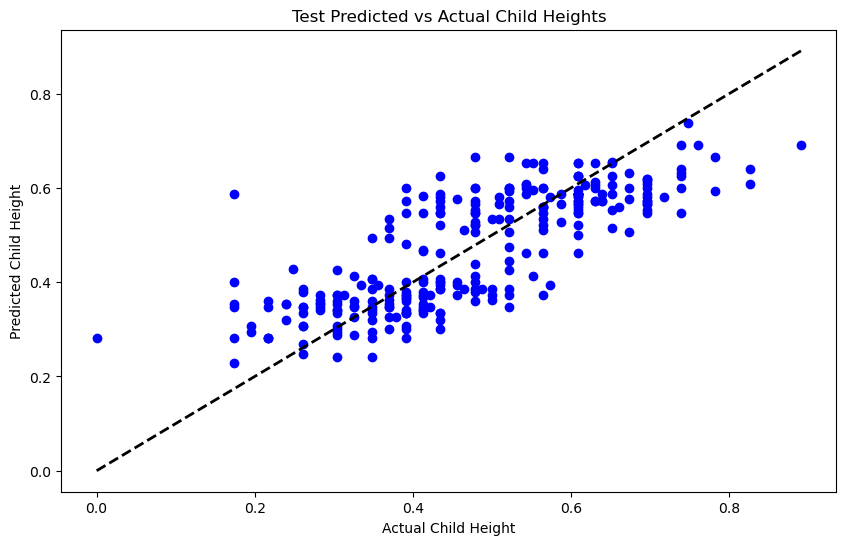

In [354]:
# Plot the predicted vs actual child heights
Y_train_pred=model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_train_pred, color='blue')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)
plt.title('Train Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Test Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [355]:
# Calculate R2
metric = keras.metrics.R2Score()
metric.update_state(Y_test, model.predict(X_test))
result = metric.result()
result

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.625263>

In [356]:
# Corelation between classic averaged parents and children
corr_coefficient, p_value = stats.pearsonr(np.array(normalized_parents_average),np.array(normalized_childheight))
print("correlation: ", corr_coefficient, "--> with p_value: ", p_value)

correlation:  0.3224426772003303 --> with p_value:  4.866482770558748e-24


### Galton midparent height as an input, in addition to gender

In [157]:
# relevant data-frame columns
families=df[["gender","midparentHeight","childHeight"]]

In [159]:
families=np.array(families)

In [161]:
# model input
X=families[:,0:2]
# normalize
x1=X[:,1]
min_x1=min(x1)
max_x1=max(x1)
X[:,1]=(x1-min_x1)/(max_x1-min_x1)
X

array([[1.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 0.2030825 ],
       [1.        , 0.07887579],
       [0.        , 0.07887579]])

In [163]:
# model output
Y=families[:,2]
#normalize
min_y=min(Y)
max_y=max(Y)
Y=(Y-min_y)/(max_y-min_y)

In [363]:
# split to train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [364]:
# train the model
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = tf.keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=10000, validation_data=(X_test,Y_test), callbacks=[callback])

Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_106 (Dense)                    │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0641 - val_loss: 0.0566
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0573 - val_loss: 0.0492
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0502 - val_loss: 0.0432
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0405 - val_loss: 0.0381
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0426 - val_loss: 0.0335
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0355 - val_loss: 0.0297
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0292 - val_loss: 0.0265
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0277 - val_loss: 0.0237
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0253 - val_loss: 0.0213
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0220 - val_loss: 0.0191
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0200 - val_loss: 0.0174
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

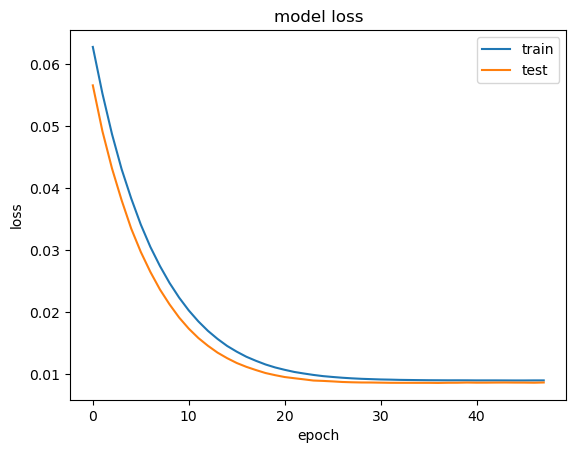

In [365]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


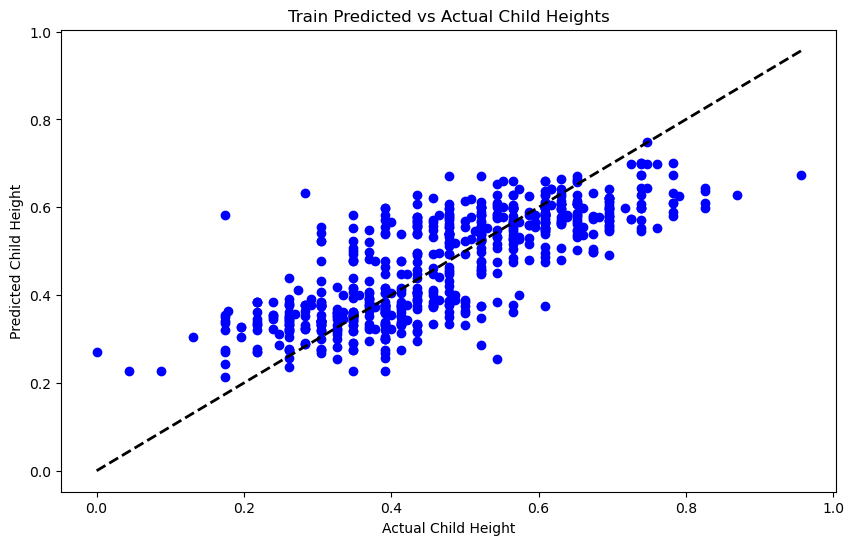

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step


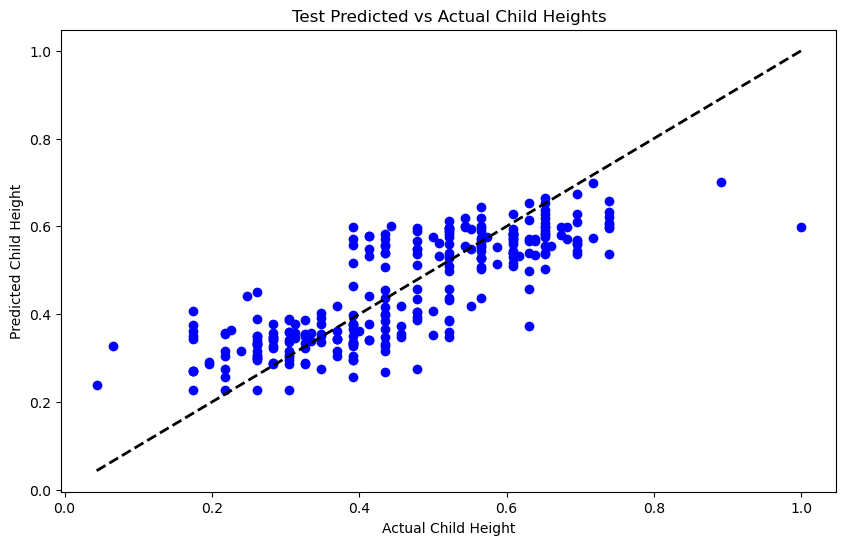

In [366]:
# Plot the predicted vs actual child heights
Y_train_pred=model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_train_pred, color='blue')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)
plt.title('Train Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Test Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [367]:
# Calculate R2
metric = keras.metrics.R2Score()
metric.update_state(Y_test, Y_test_pred)
result = metric.result()
result

<tf.Tensor: shape=(), dtype=float32, numpy=0.66357183>

### Mom and dad heights as two separate inputs, in addition to gender

In [165]:
families=df[["gender","father","mother","childHeight"]]

In [167]:
families=np.array(families)

In [169]:
X=families[:,0:3]
x1=X[:,1]
# Normalize
min_x1=min(x1)
max_x1=max(x1)
X[:,1]=(x1-min_x1)/(max_x1-min_x1)
x2=X[:,2]
# Normalize
min_x2=min(x2)
max_x2=max(x2)
X[:,2]=(x2-min_x2)/(max_x2-min_x2)

X

array([[1.        , 1.        , 0.72      ],
       [0.        , 1.        , 0.72      ],
       [0.        , 1.        , 0.72      ],
       ...,
       [0.        , 0.        , 0.64      ],
       [1.        , 0.03030303, 0.4       ],
       [0.        , 0.03030303, 0.4       ]])

In [373]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [374]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = tf.keras.Sequential([
    keras.Input(shape=(3,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=10000, validation_data=(X_test,Y_test), callbacks=[callback])

Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_107 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2749 - val_loss: 0.2722
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2650 - val_loss: 0.2617
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2467 - val_loss: 0.2517
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2378 - val_loss: 0.2420
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2384 - val_loss: 0.2324
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2228 - val_loss: 0.2232
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2094 - val_loss: 0.2144
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2039 - val_loss: 0.2056
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.1922 - val_loss: 0.1972
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1896 - val_loss: 0.1890
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1862 - val_loss: 0.1811
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

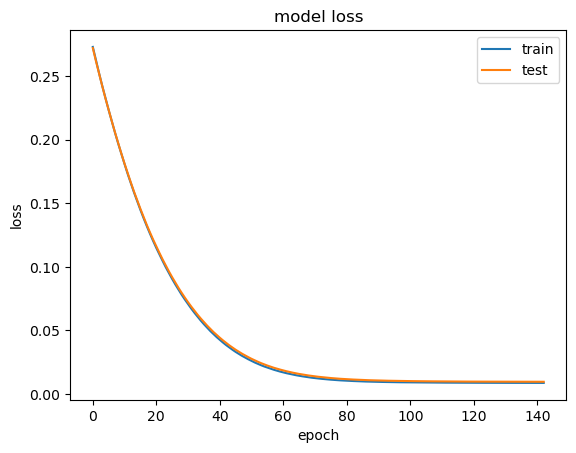

In [375]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


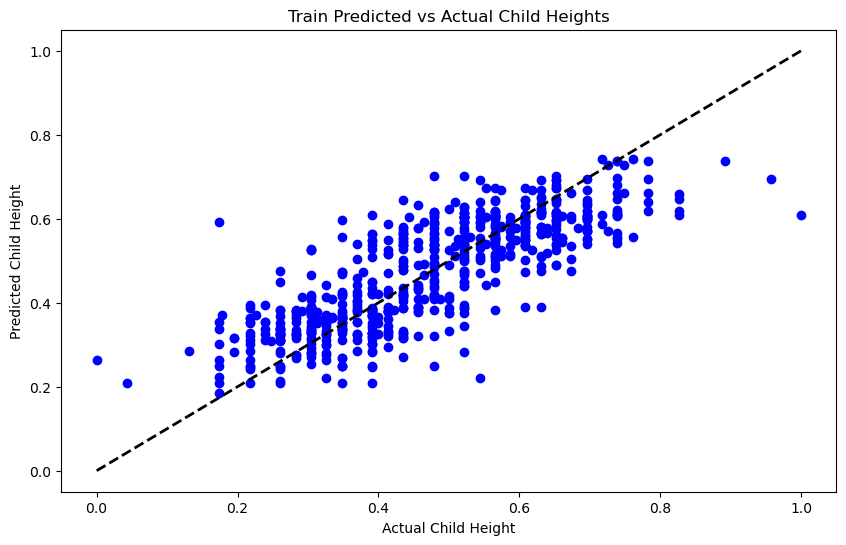

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


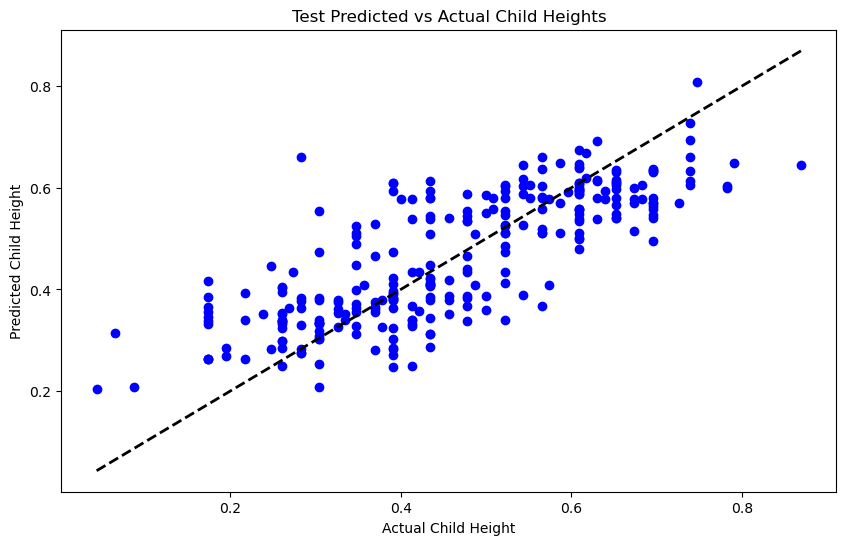

In [376]:
# Plot the predicted vs actual child heights
Y_train_pred=model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_train_pred, color='blue')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)
plt.title('Train Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Test Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [377]:
# Calculate R2
metric = keras.metrics.R2Score()
metric.update_state(Y_test, Y_test_pred)
result = metric.result()
result

<tf.Tensor: shape=(), dtype=float32, numpy=0.62358004>

### Extracting the optimal weights for the parents' heights in order to predict the child's height: averaging over 100 models

In [379]:
# for-loop to get weights - 100 models 
moms=[]
dads=[]
for i in range(100):
    callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    model = tf.keras.Sequential([
    keras.Input(shape=(3,)),
    layers.Dense(units=1)
    ])

    model.summary()

    X_train = np.asarray(X_train).astype('float32')
    Y_train = np.asarray(Y_train).astype('float32')
    X_test = np.asarray(X_test).astype('float32')
    Y_test = np.asarray(Y_test).astype('float32')

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        loss='mean_squared_error')
    history = model.fit(X_train, Y_train, epochs=10000, validation_data=(X_test,Y_test), callbacks=[callback])
    weights=model.get_weights()
    dads.append(weights[0][1][0])
    moms.append(weights[0][2][0])

Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5973 - val_loss: 1.4214
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4442 - val_loss: 1.3043
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3113 - val_loss: 1.1944
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2707 - val_loss: 1.0907
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1501 - val_loss: 0.9957
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0417 - val_loss: 0.9076
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9245 - val_loss: 0.8254
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8971 - val_loss: 0.7483
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8079 - val_loss: 0.6772
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6460 - val_loss: 0.6139
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6358 - val_loss: 0.5529
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4709 - val_loss: 0.4491
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4245 - val_loss: 0.4165
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3941 - val_loss: 0.3901
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3865 - val_loss: 0.3681
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.3581 - val_loss: 0.3505
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3372 - val_loss: 0.3359
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3231 - val_loss: 0.3236
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3021 - val_loss: 0.3126
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2937 - val_loss: 0.3027
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.2985 - val_loss: 0.2931
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.2848 - val_loss: 0.2844
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━

Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5180 - val_loss: 0.5085
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4816 - val_loss: 0.4475
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4201 - val_loss: 0.3945
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3586 - val_loss: 0.3477
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2975 - val_loss: 0.3075
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2728 - val_loss: 0.2725
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2780 - val_loss: 0.2420
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2150 - val_loss: 0.2174
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1976 - val_loss: 0.1959
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1549 - val_loss: 0.1781
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1565 - val_loss: 0.1631
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1476 - val_loss: 0.1403
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1385 - val_loss: 0.1291
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1293 - val_loss: 0.1194
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1141 - val_loss: 0.1116
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1101 - val_loss: 0.1042
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0982 - val_loss: 0.0977
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0905 - val_loss: 0.0918
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0879 - val_loss: 0.0861
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0813 - val_loss: 0.0810
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0762 - val_loss: 0.0762
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0734 - val_loss: 0.0718
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0960 - val_loss: 0.0789
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0776 - val_loss: 0.0634
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0613 - val_loss: 0.0532
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0549 - val_loss: 0.0462
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0470 - val_loss: 0.0410
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0425 - val_loss: 0.0368
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0361 - val_loss: 0.0332
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0338 - val_loss: 0.0301
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0335 - val_loss: 0.0276
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0276 - val_loss: 0.0254
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0255 - val_loss: 0.0236
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2356 - val_loss: 0.1780
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1911 - val_loss: 0.1518
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1628 - val_loss: 0.1315
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1411 - val_loss: 0.1163
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1340 - val_loss: 0.1050
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1095 - val_loss: 0.0964
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1049 - val_loss: 0.0898
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0873 - val_loss: 0.0848
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0882 - val_loss: 0.0802
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0828 - val_loss: 0.0763
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0880 - val_loss: 0.0730
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2697 - val_loss: 1.1120
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0984 - val_loss: 1.0099
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0450 - val_loss: 0.9140
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9451 - val_loss: 0.8265
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8773 - val_loss: 0.7459
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7779 - val_loss: 0.6715
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6958 - val_loss: 0.6039
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6209 - val_loss: 0.5417
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5478 - val_loss: 0.4854
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5048 - val_loss: 0.4335
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4476 - val_loss: 0.3870
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_115 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0956 - val_loss: 0.0861
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0771 - val_loss: 0.0665
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0553 - val_loss: 0.0529
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0421 - val_loss: 0.0438
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0371 - val_loss: 0.0378
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.0328 - val_loss: 0.0341
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0270 - val_loss: 0.0318
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.0278 - val_loss: 0.0301
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0249 - val_loss: 0.0287
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243 - val_loss: 0.0275
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0239 - val_loss: 0.0265
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━

Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6684 - val_loss: 0.5818
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5892 - val_loss: 0.5087
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5151 - val_loss: 0.4432
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4277 - val_loss: 0.3850
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4100 - val_loss: 0.3330
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3428 - val_loss: 0.2870
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2885 - val_loss: 0.2470
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2557 - val_loss: 0.2113
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2216 - val_loss: 0.1805
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1709 - val_loss: 0.1545
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1582 - val_loss: 0.1316
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_117 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2053 - val_loss: 0.1850
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1945 - val_loss: 0.1737
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1750 - val_loss: 0.1642
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1683 - val_loss: 0.1553
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1580 - val_loss: 0.1472
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1479 - val_loss: 0.1396
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1363 - val_loss: 0.1325
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1298 - val_loss: 0.1256
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1201 - val_loss: 0.1194
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1188 - val_loss: 0.1133
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.1194 - val_loss: 0.1074
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0386 - val_loss: 0.0285
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0250 - val_loss: 0.0229
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0220 - val_loss: 0.0204
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 - val_loss: 0.0192
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183 - val_loss: 0.0181
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171 - val_loss: 0.0172
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - val_loss: 0.0164
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128 - val_loss: 0.0156
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - val_loss: 0.0148
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.0126 - val_loss: 0.0142
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 - val_loss: 0.0136
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_119 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2737 - val_loss: 0.2194
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2120 - val_loss: 0.1870
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1851 - val_loss: 0.1606
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1700 - val_loss: 0.1400
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1452 - val_loss: 0.1241
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1261 - val_loss: 0.1122
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1108 - val_loss: 0.1032
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1054 - val_loss: 0.0962
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0926 - val_loss: 0.0910
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0933 - val_loss: 0.0868
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0887 - val_loss: 0.0833
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.1463 - val_loss: 3.8238
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6829 - val_loss: 3.6289
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7784 - val_loss: 3.4404
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4264 - val_loss: 3.2632
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4224 - val_loss: 3.0884
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2124 - val_loss: 2.9244
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9715 - val_loss: 2.7664
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6912 - val_loss: 2.6181
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7403 - val_loss: 2.4718
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6055 - val_loss: 2.3338
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4333 - val_loss: 2.2032
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_121 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.2145 - val_loss: 2.0154
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0308 - val_loss: 1.8742
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9450 - val_loss: 1.7397
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7466 - val_loss: 1.6144
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5868 - val_loss: 1.4945
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4773 - val_loss: 1.3814
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 1.3821 - val_loss: 1.2754
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3123 - val_loss: 1.1757
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1971 - val_loss: 1.0827
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1484 - val_loss: 0.9960
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0264 - val_loss: 0.9140
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_122 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6556 - val_loss: 0.6199
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6262 - val_loss: 0.5888
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5906 - val_loss: 0.5637
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5531 - val_loss: 0.5428
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5181 - val_loss: 0.5247
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4928 - val_loss: 0.5086
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4889 - val_loss: 0.4941
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4663 - val_loss: 0.4804
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4610 - val_loss: 0.4679
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4600 - val_loss: 0.4553
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4379 - val_loss: 0.4437
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0954 - val_loss: 1.8806
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9168 - val_loss: 1.7513
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6458 - val_loss: 1.6293
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5645 - val_loss: 1.5125
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4923 - val_loss: 1.4031
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3180 - val_loss: 1.3011
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2698 - val_loss: 1.2058
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1730 - val_loss: 1.1161
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0507 - val_loss: 1.0341
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0230 - val_loss: 0.9566
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9101 - val_loss: 0.8840
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7613 - val_loss: 0.6902
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7091 - val_loss: 0.6282
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6114 - val_loss: 0.5747
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5805 - val_loss: 0.5267
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5229 - val_loss: 0.4846
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4820 - val_loss: 0.4483
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4444 - val_loss: 0.4163
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4249 - val_loss: 0.3878
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3844 - val_loss: 0.3644
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3581 - val_loss: 0.3441
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3454 - val_loss: 0.3264
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_125 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3509 - val_loss: 0.3233
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3042 - val_loss: 0.2781
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2841 - val_loss: 0.2401
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2419 - val_loss: 0.2091
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2187 - val_loss: 0.1833
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1900 - val_loss: 0.1620
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1697 - val_loss: 0.1446
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1469 - val_loss: 0.1307
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1344 - val_loss: 0.1194
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1222 - val_loss: 0.1108
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1117 - val_loss: 0.1036
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.4814 - val_loss: 0.4716
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4547 - val_loss: 0.4561
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4565 - val_loss: 0.4415
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4600 - val_loss: 0.4283
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4388 - val_loss: 0.4159
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4141 - val_loss: 0.4038
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4055 - val_loss: 0.3920
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3820 - val_loss: 0.3806
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3736 - val_loss: 0.3693
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3624 - val_loss: 0.3582
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3483 - val_loss: 0.3475
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━

Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_127 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1266 - val_loss: 0.1060
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1053 - val_loss: 0.0812
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0781 - val_loss: 0.0629
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0630 - val_loss: 0.0496
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0511 - val_loss: 0.0406
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0405 - val_loss: 0.0347
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345 - val_loss: 0.0309
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0306 - val_loss: 0.0286
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0263 - val_loss: 0.0271
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261 - val_loss: 0.0261
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261 - val_loss: 0.0255
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3440 - val_loss: 0.3466
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3059 - val_loss: 0.3049
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2664 - val_loss: 0.2702
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2317 - val_loss: 0.2416
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2300 - val_loss: 0.2182
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1903 - val_loss: 0.1994
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1803 - val_loss: 0.1847
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1591 - val_loss: 0.1728
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1607 - val_loss: 0.1626
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1518 - val_loss: 0.1548
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1507 - val_loss: 0.1481
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8847 - val_loss: 1.7737
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7398 - val_loss: 1.6451
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5920 - val_loss: 1.5259
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5203 - val_loss: 1.4129
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4161 - val_loss: 1.3062
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2565 - val_loss: 1.2079
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1664 - val_loss: 1.1160
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0653 - val_loss: 1.0293
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 1.0043 - val_loss: 0.9498
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9691 - val_loss: 0.8751
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8599 - val_loss: 0.8058
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_130 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9491 - val_loss: 0.8409
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8202 - val_loss: 0.7512
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7634 - val_loss: 0.6689
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6776 - val_loss: 0.5937
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6009 - val_loss: 0.5254
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.5235 - val_loss: 0.4639
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4489 - val_loss: 0.4082
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.4224 - val_loss: 0.3571
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3630 - val_loss: 0.3120
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3141 - val_loss: 0.2715
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2705 - val_loss: 0.2359
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━

Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_131 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1217 - val_loss: 0.0929
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0908 - val_loss: 0.0735
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0809 - val_loss: 0.0590
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0620 - val_loss: 0.0497
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0494 - val_loss: 0.0434
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0434 - val_loss: 0.0394
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0403 - val_loss: 0.0367
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0376 - val_loss: 0.0347
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0353 - val_loss: 0.0331
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346 - val_loss: 0.0316
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0299 - val_loss: 0.0302
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3112 - val_loss: 0.2605
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2785 - val_loss: 0.2259
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2565 - val_loss: 0.1977
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.2089 - val_loss: 0.1751
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.1847 - val_loss: 0.1570
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1627 - val_loss: 0.1422
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1570 - val_loss: 0.1299
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1431 - val_loss: 0.1194
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1335 - val_loss: 0.1101
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1214 - val_loss: 0.1022
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1136 - val_loss: 0.0948
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━

Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_133 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3857 - val_loss: 0.3246
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3277 - val_loss: 0.2861
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2859 - val_loss: 0.2542
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2617 - val_loss: 0.2278
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2377 - val_loss: 0.2073
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.2151 - val_loss: 0.1902
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.1948 - val_loss: 0.1767
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.1765 - val_loss: 0.1660
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.1721 - val_loss: 0.1573
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1584 - val_loss: 0.1502
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.1610 - val_loss: 0.1441
Epoch 12/10000
21/21 ━━━━━━━━━━

Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_134 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0539 - val_loss: 0.0526
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0496 - val_loss: 0.0455
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0438 - val_loss: 0.0402
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0353 - val_loss: 0.0359
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0322 - val_loss: 0.0324
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0307 - val_loss: 0.0295
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0268 - val_loss: 0.0271
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0247 - val_loss: 0.0251
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243 - val_loss: 0.0233
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209 - val_loss: 0.0217
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196 - val_loss: 0.0204
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_135"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_135 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1867 - val_loss: 0.1746
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1789 - val_loss: 0.1665
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1687 - val_loss: 0.1592
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1618 - val_loss: 0.1520
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1540 - val_loss: 0.1452
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1501 - val_loss: 0.1383
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1444 - val_loss: 0.1320
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1266 - val_loss: 0.1261
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1224 - val_loss: 0.1201
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1204 - val_loss: 0.1144
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1163 - val_loss: 0.1095
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_136 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4672 - val_loss: 1.3194
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3895 - val_loss: 1.2062
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2134 - val_loss: 1.1001
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1276 - val_loss: 1.0014
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0266 - val_loss: 0.9108
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9681 - val_loss: 0.8249
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8311 - val_loss: 0.7469
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7798 - val_loss: 0.6741
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6961 - val_loss: 0.6069
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6712 - val_loss: 0.5458
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5652 - val_loss: 0.4908
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_137"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_137 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2696 - val_loss: 0.2458
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2438 - val_loss: 0.2264
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2314 - val_loss: 0.2092
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2096 - val_loss: 0.1942
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1999 - val_loss: 0.1805
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1821 - val_loss: 0.1684
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1796 - val_loss: 0.1571
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1591 - val_loss: 0.1470
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1575 - val_loss: 0.1376
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1346 - val_loss: 0.1290
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1379 - val_loss: 0.1210
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_138 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3884 - val_loss: 0.3412
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3275 - val_loss: 0.2876
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.2756 - val_loss: 0.2405
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2345 - val_loss: 0.2002
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1926 - val_loss: 0.1658
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1544 - val_loss: 0.1375
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1293 - val_loss: 0.1133
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1016 - val_loss: 0.0939
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0931 - val_loss: 0.0776
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0742 - val_loss: 0.0648
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0656 - val_loss: 0.0545
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_139 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4326 - val_loss: 0.3743
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3884 - val_loss: 0.3272
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3343 - val_loss: 0.2857
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2936 - val_loss: 0.2511
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2540 - val_loss: 0.2220
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2275 - val_loss: 0.1985
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2070 - val_loss: 0.1787
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1838 - val_loss: 0.1624
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1703 - val_loss: 0.1491
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.1559 - val_loss: 0.1385
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1407 - val_loss: 0.1298
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6718 - val_loss: 2.4845
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4996 - val_loss: 2.3310
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3302 - val_loss: 2.1845
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2007 - val_loss: 2.0442
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9185 - val_loss: 1.9159
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9523 - val_loss: 1.7898
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7717 - val_loss: 1.6726
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7197 - val_loss: 1.5612
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6121 - val_loss: 1.4551
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4468 - val_loss: 1.3573
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3433 - val_loss: 1.2646
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_141"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_141 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0708 - val_loss: 0.0511
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0508 - val_loss: 0.0424
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0402 - val_loss: 0.0379
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0346 - val_loss: 0.0355
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0331 - val_loss: 0.0340
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0313 - val_loss: 0.0327
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0307 - val_loss: 0.0317
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0284 - val_loss: 0.0305
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0273 - val_loss: 0.0295
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0251 - val_loss: 0.0287
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0256 - val_loss: 0.0278
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_142"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_142 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1961 - val_loss: 0.1944
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1768 - val_loss: 0.1761
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1534 - val_loss: 0.1630
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1466 - val_loss: 0.1529
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1460 - val_loss: 0.1454
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1364 - val_loss: 0.1389
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1315 - val_loss: 0.1328
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1206 - val_loss: 0.1271
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1152 - val_loss: 0.1215
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1097 - val_loss: 0.1162
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1087 - val_loss: 0.1111
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_143"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_143 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.3593 - val_loss: 3.9772
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9630 - val_loss: 3.7794
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0410 - val_loss: 3.5878
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7072 - val_loss: 3.4049
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4455 - val_loss: 3.2284
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2656 - val_loss: 3.0586
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0402 - val_loss: 2.8957
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8732 - val_loss: 2.7410
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8051 - val_loss: 2.5921
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6256 - val_loss: 2.4512
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5726 - val_loss: 2.3143
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_144"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2690 - val_loss: 0.2308
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2143 - val_loss: 0.1957
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1751 - val_loss: 0.1668
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1492 - val_loss: 0.1447
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1399 - val_loss: 0.1268
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1199 - val_loss: 0.1132
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1086 - val_loss: 0.1027
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1073 - val_loss: 0.0941
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0884 - val_loss: 0.0882
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0929 - val_loss: 0.0830
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0837 - val_loss: 0.0790
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_145"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_145 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6936 - val_loss: 2.5029
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5568 - val_loss: 2.3466
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4090 - val_loss: 2.2000
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2796 - val_loss: 2.0604
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2267 - val_loss: 1.9265
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 1.9622 - val_loss: 1.8036
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8773 - val_loss: 1.6836
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7698 - val_loss: 1.5712
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6028 - val_loss: 1.4666
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4743 - val_loss: 1.3671
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3814 - val_loss: 1.2733
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_146"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_146 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2377 - val_loss: 0.2343
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2293 - val_loss: 0.2236
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2211 - val_loss: 0.2133
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2034 - val_loss: 0.2036
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1951 - val_loss: 0.1943
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1915 - val_loss: 0.1855
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1795 - val_loss: 0.1771
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1652 - val_loss: 0.1690
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1662 - val_loss: 0.1612
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1532 - val_loss: 0.1539
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1463 - val_loss: 0.1468
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_147"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_147 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0137 - val_loss: 0.9263
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9351 - val_loss: 0.8427
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8334 - val_loss: 0.7664
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7866 - val_loss: 0.6958
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6857 - val_loss: 0.6317
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6490 - val_loss: 0.5743
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5715 - val_loss: 0.5219
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5444 - val_loss: 0.4751
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4907 - val_loss: 0.4347
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4343 - val_loss: 0.3987
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3608 - val_loss: 0.3665
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_148"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_148 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3220 - val_loss: 0.2511
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2807 - val_loss: 0.2135
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2287 - val_loss: 0.1825
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2075 - val_loss: 0.1574
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1874 - val_loss: 0.1373
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1458 - val_loss: 0.1219
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1380 - val_loss: 0.1102
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1220 - val_loss: 0.1012
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1133 - val_loss: 0.0942
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1045 - val_loss: 0.0892
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0985 - val_loss: 0.0852
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_149"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_149 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5557 - val_loss: 2.3070
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2689 - val_loss: 2.1573
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1616 - val_loss: 2.0143
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0636 - val_loss: 1.8778
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8602 - val_loss: 1.7499
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7661 - val_loss: 1.6283
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6834 - val_loss: 1.5135
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 1.5277 - val_loss: 1.4068
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3128 - val_loss: 1.3054
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3135 - val_loss: 1.2083
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1678 - val_loss: 1.1191
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_150"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2769 - val_loss: 0.2589
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.2581 - val_loss: 0.2339
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2314 - val_loss: 0.2162
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2200 - val_loss: 0.2014
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2013 - val_loss: 0.1899
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1819 - val_loss: 0.1811
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1829 - val_loss: 0.1736
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1644 - val_loss: 0.1670
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1697 - val_loss: 0.1608
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1560 - val_loss: 0.1551
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1518 - val_loss: 0.1495
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_151"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_151 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1078 - val_loss: 0.9600
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0040 - val_loss: 0.8649
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8734 - val_loss: 0.7766
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7841 - val_loss: 0.6955
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7406 - val_loss: 0.6207
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6414 - val_loss: 0.5534
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5720 - val_loss: 0.4909
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5253 - val_loss: 0.4344
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4536 - val_loss: 0.3835
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4137 - val_loss: 0.3380
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3603 - val_loss: 0.2976
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_152 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4653 - val_loss: 0.4274
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4091 - val_loss: 0.3753
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3715 - val_loss: 0.3304
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3311 - val_loss: 0.2927
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2862 - val_loss: 0.2601
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2538 - val_loss: 0.2328
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2496 - val_loss: 0.2096
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2123 - val_loss: 0.1905
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1926 - val_loss: 0.1739
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1906 - val_loss: 0.1595
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1682 - val_loss: 0.1477
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_153"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_153 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8398 - val_loss: 0.7956
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7953 - val_loss: 0.7220
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6928 - val_loss: 0.6575
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6237 - val_loss: 0.5980
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5440 - val_loss: 0.5461
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5406 - val_loss: 0.4988
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4616 - val_loss: 0.4589
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4524 - val_loss: 0.4211
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3905 - val_loss: 0.3904
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3531 - val_loss: 0.3622
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3348 - val_loss: 0.3374
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_154"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_154 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0858 - val_loss: 0.0665
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0698 - val_loss: 0.0566
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.0597 - val_loss: 0.0508
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0518 - val_loss: 0.0478
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0477 - val_loss: 0.0460
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0467 - val_loss: 0.0446
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0460 - val_loss: 0.0435
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0411 - val_loss: 0.0423
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0418 - val_loss: 0.0410
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.0377 - val_loss: 0.0396
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0388 - val_loss: 0.0383
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━

Model: "sequential_155"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_155 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0039 - val_loss: 1.8454
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8810 - val_loss: 1.7102
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7386 - val_loss: 1.5823
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6363 - val_loss: 1.4627
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4785 - val_loss: 1.3492
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4119 - val_loss: 1.2430
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2750 - val_loss: 1.1444
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1896 - val_loss: 1.0509
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1077 - val_loss: 0.9639
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0442 - val_loss: 0.8823
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9376 - val_loss: 0.8070
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_156"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8935 - val_loss: 0.7569
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7665 - val_loss: 0.6778
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6853 - val_loss: 0.6052
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6109 - val_loss: 0.5400
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5561 - val_loss: 0.4815
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5035 - val_loss: 0.4287
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4269 - val_loss: 0.3813
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3903 - val_loss: 0.3397
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3582 - val_loss: 0.3035
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3293 - val_loss: 0.2707
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2731 - val_loss: 0.2431
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_157"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_157 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1403 - val_loss: 1.0398
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0495 - val_loss: 0.9404
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9166 - val_loss: 0.8482
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8033 - val_loss: 0.7629
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7556 - val_loss: 0.6841
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6840 - val_loss: 0.6131
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5831 - val_loss: 0.5471
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5686 - val_loss: 0.4868
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5058 - val_loss: 0.4328
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4189 - val_loss: 0.3849
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3701 - val_loss: 0.3408
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_158"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_158 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4095 - val_loss: 1.2859
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2877 - val_loss: 1.1741
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1901 - val_loss: 1.0696
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0786 - val_loss: 0.9723
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9528 - val_loss: 0.8824
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8733 - val_loss: 0.7984
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7793 - val_loss: 0.7210
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7172 - val_loss: 0.6499
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6299 - val_loss: 0.5843
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5915 - val_loss: 0.5244
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5292 - val_loss: 0.4693
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_159"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_159 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7166 - val_loss: 0.6421
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6493 - val_loss: 0.5879
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5933 - val_loss: 0.5400
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5491 - val_loss: 0.4982
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5100 - val_loss: 0.4619
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4735 - val_loss: 0.4302
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4399 - val_loss: 0.4019
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4131 - val_loss: 0.3765
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4046 - val_loss: 0.3530
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3926 - val_loss: 0.3322
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3596 - val_loss: 0.3132
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_160 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1614 - val_loss: 0.1400
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1272 - val_loss: 0.1113
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0999 - val_loss: 0.0892
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0812 - val_loss: 0.0726
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0717 - val_loss: 0.0603
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0550 - val_loss: 0.0521
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0502 - val_loss: 0.0462
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0464 - val_loss: 0.0422
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0421 - val_loss: 0.0392
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0394 - val_loss: 0.0371
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0405 - val_loss: 0.0356
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_161"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1808 - val_loss: 0.1912
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1977 - val_loss: 0.1812
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1755 - val_loss: 0.1723
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1631 - val_loss: 0.1640
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1567 - val_loss: 0.1559
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1477 - val_loss: 0.1482
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1354 - val_loss: 0.1409
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1349 - val_loss: 0.1340
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1274 - val_loss: 0.1273
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1183 - val_loss: 0.1210
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1153 - val_loss: 0.1149
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_162"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_162 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6155 - val_loss: 0.5359
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5425 - val_loss: 0.4655
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4611 - val_loss: 0.4029
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4052 - val_loss: 0.3465
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3499 - val_loss: 0.2974
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3098 - val_loss: 0.2536
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2528 - val_loss: 0.2157
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2201 - val_loss: 0.1826
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1882 - val_loss: 0.1542
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1598 - val_loss: 0.1301
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1276 - val_loss: 0.1096
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_163"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_163 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1434 - val_loss: 0.1376
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1274 - val_loss: 0.1218
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1154 - val_loss: 0.1115
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1086 - val_loss: 0.1043
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0950 - val_loss: 0.0988
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0919 - val_loss: 0.0940
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0917 - val_loss: 0.0895
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0853 - val_loss: 0.0852
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0820 - val_loss: 0.0811
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0743 - val_loss: 0.0771
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0703 - val_loss: 0.0732
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_164"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_164 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1630 - val_loss: 0.1521
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1390 - val_loss: 0.1420
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1418 - val_loss: 0.1324
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1291 - val_loss: 0.1242
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1187 - val_loss: 0.1169
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1139 - val_loss: 0.1098
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1071 - val_loss: 0.1033
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1018 - val_loss: 0.0973
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0928 - val_loss: 0.0916
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0876 - val_loss: 0.0862
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0850 - val_loss: 0.0811
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_165"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_165 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6642 - val_loss: 0.5625
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5829 - val_loss: 0.5036
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5264 - val_loss: 0.4514
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4581 - val_loss: 0.4057
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4147 - val_loss: 0.3658
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3635 - val_loss: 0.3315
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3450 - val_loss: 0.3024
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3235 - val_loss: 0.2767
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2874 - val_loss: 0.2557
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2668 - val_loss: 0.2373
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2377 - val_loss: 0.2220
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_166"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_166 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1050 - val_loss: 0.1004
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0954 - val_loss: 0.0887
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0871 - val_loss: 0.0793
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0687 - val_loss: 0.0715
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0662 - val_loss: 0.0647
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0623 - val_loss: 0.0589
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0591 - val_loss: 0.0539
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0489 - val_loss: 0.0497
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0446 - val_loss: 0.0459
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0424 - val_loss: 0.0425
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.0388 - val_loss: 0.0396
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_167"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_167 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3951 - val_loss: 0.3144
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3107 - val_loss: 0.2665
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2727 - val_loss: 0.2250
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2294 - val_loss: 0.1902
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1999 - val_loss: 0.1613
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1673 - val_loss: 0.1372
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1490 - val_loss: 0.1172
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1167 - val_loss: 0.1018
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0995 - val_loss: 0.0887
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0934 - val_loss: 0.0787
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0860 - val_loss: 0.0710
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_168"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3550 - val_loss: 1.2381
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2504 - val_loss: 1.1387
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1665 - val_loss: 1.0471
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0593 - val_loss: 0.9646
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9744 - val_loss: 0.8872
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8722 - val_loss: 0.8170
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8420 - val_loss: 0.7518
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7613 - val_loss: 0.6926
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7285 - val_loss: 0.6390
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6144 - val_loss: 0.5913
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6037 - val_loss: 0.5460
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_169 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4784 - val_loss: 1.3370
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3589 - val_loss: 1.2237
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2403 - val_loss: 1.1182
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1173 - val_loss: 1.0191
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0087 - val_loss: 0.9272
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9377 - val_loss: 0.8425
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8314 - val_loss: 0.7640
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7557 - val_loss: 0.6912
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6681 - val_loss: 0.6245
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6428 - val_loss: 0.5628
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5671 - val_loss: 0.5068
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_170"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_170 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5532 - val_loss: 0.4585
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4663 - val_loss: 0.3942
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4012 - val_loss: 0.3370
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3477 - val_loss: 0.2865
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3036 - val_loss: 0.2422
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2501 - val_loss: 0.2039
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2071 - val_loss: 0.1709
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1778 - val_loss: 0.1426
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1502 - val_loss: 0.1187
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1224 - val_loss: 0.0985
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1008 - val_loss: 0.0817
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_171"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_171 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4770 - val_loss: 1.3491
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3888 - val_loss: 1.2345
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1992 - val_loss: 1.1281
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1277 - val_loss: 1.0277
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0380 - val_loss: 0.9342
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9169 - val_loss: 0.8487
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8374 - val_loss: 0.7690
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7432 - val_loss: 0.6953
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6798 - val_loss: 0.6278
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6101 - val_loss: 0.5660
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5545 - val_loss: 0.5087
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_172"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_172 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4216 - val_loss: 0.3460
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3500 - val_loss: 0.3038
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3120 - val_loss: 0.2683
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2931 - val_loss: 0.2383
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2477 - val_loss: 0.2143
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2173 - val_loss: 0.1944
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2092 - val_loss: 0.1771
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1856 - val_loss: 0.1632
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1826 - val_loss: 0.1511
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1602 - val_loss: 0.1405
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1469 - val_loss: 0.1310
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_173"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_173 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6696 - val_loss: 0.5721
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5719 - val_loss: 0.5053
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5233 - val_loss: 0.4460
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4732 - val_loss: 0.3922
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4148 - val_loss: 0.3452
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3840 - val_loss: 0.3040
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3231 - val_loss: 0.2693
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2843 - val_loss: 0.2389
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2460 - val_loss: 0.2127
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2180 - val_loss: 0.1901
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2025 - val_loss: 0.1710
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_174"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_174 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6116 - val_loss: 0.5376
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5010 - val_loss: 0.4683
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4560 - val_loss: 0.4056
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3793 - val_loss: 0.3509
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3200 - val_loss: 0.3021
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2902 - val_loss: 0.2591
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2483 - val_loss: 0.2220
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2117 - val_loss: 0.1898
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1765 - val_loss: 0.1622
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1533 - val_loss: 0.1384
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1304 - val_loss: 0.1183
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_175"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_175 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1455 - val_loss: 1.1062
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0400 - val_loss: 1.0098
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9795 - val_loss: 0.9194
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8337 - val_loss: 0.8377
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8028 - val_loss: 0.7617
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7688 - val_loss: 0.6929
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6684 - val_loss: 0.6306
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5813 - val_loss: 0.5746
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5113 - val_loss: 0.5231
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5100 - val_loss: 0.4760
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4248 - val_loss: 0.4353
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_176"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_176 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1209 - val_loss: 0.0978
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0955 - val_loss: 0.0777
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0763 - val_loss: 0.0637
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0664 - val_loss: 0.0543
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0538 - val_loss: 0.0482
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0479 - val_loss: 0.0442
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0438 - val_loss: 0.0415
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0352 - val_loss: 0.0393
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0367 - val_loss: 0.0375
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348 - val_loss: 0.0359
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0310 - val_loss: 0.0344
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_177"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_177 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8241 - val_loss: 1.6620
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7618 - val_loss: 1.5418
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6083 - val_loss: 1.4296
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4603 - val_loss: 1.3253
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4039 - val_loss: 1.2266
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2918 - val_loss: 1.1354
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2365 - val_loss: 1.0515
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1084 - val_loss: 0.9741
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9778 - val_loss: 0.9022
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8893 - val_loss: 0.8334
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8936 - val_loss: 0.7710
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_178"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_178 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6885 - val_loss: 0.6354
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6396 - val_loss: 0.5632
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5556 - val_loss: 0.4986
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5008 - val_loss: 0.4403
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4418 - val_loss: 0.3890
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4064 - val_loss: 0.3435
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3488 - val_loss: 0.3037
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3179 - val_loss: 0.2685
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2511 - val_loss: 0.2384
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2255 - val_loss: 0.2122
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2161 - val_loss: 0.1890
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_179"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_179 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0963 - val_loss: 0.1015
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0999 - val_loss: 0.0949
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0879 - val_loss: 0.0893
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0791 - val_loss: 0.0842
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0731 - val_loss: 0.0793
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0760 - val_loss: 0.0745
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0712 - val_loss: 0.0703
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0617 - val_loss: 0.0662
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0585 - val_loss: 0.0623
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0549 - val_loss: 0.0588
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0517 - val_loss: 0.0554
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_180"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_180 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.5393 - val_loss: 3.3939
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5549 - val_loss: 3.2073
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3267 - val_loss: 3.0311
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1127 - val_loss: 2.8628
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0323 - val_loss: 2.7001
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8611 - val_loss: 2.5456
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6054 - val_loss: 2.3993
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4385 - val_loss: 2.2583
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3099 - val_loss: 2.1240
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1683 - val_loss: 1.9974
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0559 - val_loss: 1.8743
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_181"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_181 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8928 - val_loss: 1.7080
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7209 - val_loss: 1.5787
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5912 - val_loss: 1.4559
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4749 - val_loss: 1.3410
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3808 - val_loss: 1.2322
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2640 - val_loss: 1.1309
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1613 - val_loss: 1.0358
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0374 - val_loss: 0.9479
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9582 - val_loss: 0.8655
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8959 - val_loss: 0.7884
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8040 - val_loss: 0.7174
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_182"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_182 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2492 - val_loss: 0.2386
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2327 - val_loss: 0.2186
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2225 - val_loss: 0.2032
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2074 - val_loss: 0.1915
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1857 - val_loss: 0.1828
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1809 - val_loss: 0.1752
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1740 - val_loss: 0.1683
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1583 - val_loss: 0.1621
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1553 - val_loss: 0.1561
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1463 - val_loss: 0.1503
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1398 - val_loss: 0.1446
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_183"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_183 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7275 - val_loss: 0.6338
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6661 - val_loss: 0.5693
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5795 - val_loss: 0.5125
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5477 - val_loss: 0.4620
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4494 - val_loss: 0.4183
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4427 - val_loss: 0.3794
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3878 - val_loss: 0.3457
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3704 - val_loss: 0.3164
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3466 - val_loss: 0.2910
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3059 - val_loss: 0.2692
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2826 - val_loss: 0.2499
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_184"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_184 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4201 - val_loss: 0.3931
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3763 - val_loss: 0.3371
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3191 - val_loss: 0.2884
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2733 - val_loss: 0.2464
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2358 - val_loss: 0.2100
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1930 - val_loss: 0.1789
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1716 - val_loss: 0.1531
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1377 - val_loss: 0.1316
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1236 - val_loss: 0.1139
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1015 - val_loss: 0.0993
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0871 - val_loss: 0.0877
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_185"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_185 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4386 - val_loss: 0.3730
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4043 - val_loss: 0.3333
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3599 - val_loss: 0.2997
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3446 - val_loss: 0.2722
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2832 - val_loss: 0.2503
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2692 - val_loss: 0.2319
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2357 - val_loss: 0.2170
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2272 - val_loss: 0.2047
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2044 - val_loss: 0.1951
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2006 - val_loss: 0.1870
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2016 - val_loss: 0.1802
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_186"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_186 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0049 - val_loss: 1.7801
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7821 - val_loss: 1.6552
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6219 - val_loss: 1.5375
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6006 - val_loss: 1.4276
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4736 - val_loss: 1.3253
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3377 - val_loss: 1.2289
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1956 - val_loss: 1.1391
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2301 - val_loss: 1.0557
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0533 - val_loss: 0.9789
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0200 - val_loss: 0.9054
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9247 - val_loss: 0.8398
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_187"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_187 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1904 - val_loss: 0.1532
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1433 - val_loss: 0.1191
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1123 - val_loss: 0.0914
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0855 - val_loss: 0.0696
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0617 - val_loss: 0.0531
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0485 - val_loss: 0.0407
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0373 - val_loss: 0.0314
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0302 - val_loss: 0.0251
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0241 - val_loss: 0.0207
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.0189 - val_loss: 0.0177
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - val_loss: 0.0159
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━

Model: "sequential_188"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_188 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1269 - val_loss: 0.1006
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0969 - val_loss: 0.0894
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0971 - val_loss: 0.0821
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0890 - val_loss: 0.0774
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0762 - val_loss: 0.0739
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0798 - val_loss: 0.0706
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0732 - val_loss: 0.0676
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0660 - val_loss: 0.0647
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0685 - val_loss: 0.0617
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0611 - val_loss: 0.0588
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0598 - val_loss: 0.0561
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_189"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_189 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8226 - val_loss: 0.7240
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6937 - val_loss: 0.6617
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6745 - val_loss: 0.6057
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6214 - val_loss: 0.5566
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5901 - val_loss: 0.5136
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5420 - val_loss: 0.4755
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4985 - val_loss: 0.4429
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4524 - val_loss: 0.4137
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4570 - val_loss: 0.3873
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3834 - val_loss: 0.3645
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3711 - val_loss: 0.3432
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_190"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_190 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4270 - val_loss: 1.2966
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3727 - val_loss: 1.1943
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2493 - val_loss: 1.0988
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1235 - val_loss: 1.0095
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0529 - val_loss: 0.9274
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9384 - val_loss: 0.8527
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9064 - val_loss: 0.7829
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8240 - val_loss: 0.7203
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7279 - val_loss: 0.6624
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6852 - val_loss: 0.6091
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6342 - val_loss: 0.5614
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_191"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_191 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3284 - val_loss: 0.2812
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2836 - val_loss: 0.2331
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2311 - val_loss: 0.1922
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1887 - val_loss: 0.1576
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1572 - val_loss: 0.1288
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1222 - val_loss: 0.1051
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1053 - val_loss: 0.0858
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0871 - val_loss: 0.0706
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0674 - val_loss: 0.0588
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0557 - val_loss: 0.0493
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0508 - val_loss: 0.0421
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_192"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_192 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6653 - val_loss: 0.6331
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6171 - val_loss: 0.5790
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5434 - val_loss: 0.5333
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5249 - val_loss: 0.4924
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5039 - val_loss: 0.4580
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4395 - val_loss: 0.4296
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4278 - val_loss: 0.4042
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4066 - val_loss: 0.3829
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3668 - val_loss: 0.3654
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3532 - val_loss: 0.3497
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3357 - val_loss: 0.3360
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_193"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_193 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4700 - val_loss: 0.4502
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4722 - val_loss: 0.4153
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4566 - val_loss: 0.3838
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4162 - val_loss: 0.3560
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3569 - val_loss: 0.3301
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3472 - val_loss: 0.3051
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3187 - val_loss: 0.2826
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2894 - val_loss: 0.2609
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2556 - val_loss: 0.2422
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2644 - val_loss: 0.2235
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2387 - val_loss: 0.2073
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_194"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_194 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1178 - val_loss: 0.0940
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0926 - val_loss: 0.0784
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0773 - val_loss: 0.0679
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0641 - val_loss: 0.0607
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0604 - val_loss: 0.0555
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0517 - val_loss: 0.0514
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0469 - val_loss: 0.0478
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0461 - val_loss: 0.0447
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0420 - val_loss: 0.0419
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0394 - val_loss: 0.0394
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0381 - val_loss: 0.0371
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_195"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_195 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1392 - val_loss: 0.1072
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1144 - val_loss: 0.0802
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0872 - val_loss: 0.0597
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0633 - val_loss: 0.0448
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0503 - val_loss: 0.0341
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0353 - val_loss: 0.0270
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0295 - val_loss: 0.0222
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235 - val_loss: 0.0192
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197 - val_loss: 0.0175
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - val_loss: 0.0164
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0164 - val_loss: 0.0158
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_196"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_196 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1963 - val_loss: 1.0834
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1233 - val_loss: 0.9876
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0382 - val_loss: 0.8995
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9609 - val_loss: 0.8186
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8167 - val_loss: 0.7454
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7472 - val_loss: 0.6774
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7256 - val_loss: 0.6152
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6250 - val_loss: 0.5593
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5846 - val_loss: 0.5086
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5312 - val_loss: 0.4626
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4988 - val_loss: 0.4209
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_197"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_197 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7386 - val_loss: 0.6602
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6689 - val_loss: 0.5841
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5973 - val_loss: 0.5144
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5305 - val_loss: 0.4526
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4688 - val_loss: 0.3971
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3846 - val_loss: 0.3482
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3360 - val_loss: 0.3045
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3069 - val_loss: 0.2656
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2780 - val_loss: 0.2314
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2366 - val_loss: 0.2023
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2044 - val_loss: 0.1768
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_198"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_198 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1227 - val_loss: 0.1116
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1104 - val_loss: 0.0984
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0981 - val_loss: 0.0875
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0937 - val_loss: 0.0786
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0832 - val_loss: 0.0710
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0722 - val_loss: 0.0644
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0656 - val_loss: 0.0589
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0599 - val_loss: 0.0540
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0526 - val_loss: 0.0497
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0534 - val_loss: 0.0458
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0482 - val_loss: 0.0424
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_199"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_199 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8006 - val_loss: 0.7110
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6827 - val_loss: 0.6435
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6079 - val_loss: 0.5830
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5785 - val_loss: 0.5278
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5004 - val_loss: 0.4790
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4547 - val_loss: 0.4365
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4292 - val_loss: 0.3988
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3727 - val_loss: 0.3666
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3697 - val_loss: 0.3377
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3183 - val_loss: 0.3142
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3041 - val_loss: 0.2932
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_200"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_200 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7317 - val_loss: 0.6880
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6540 - val_loss: 0.6231
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5863 - val_loss: 0.5656
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5267 - val_loss: 0.5141
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5160 - val_loss: 0.4682
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4440 - val_loss: 0.4304
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4116 - val_loss: 0.3950
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3802 - val_loss: 0.3650
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3361 - val_loss: 0.3404
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3042 - val_loss: 0.3184
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2958 - val_loss: 0.2995
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_201 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5058 - val_loss: 1.3965
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4274 - val_loss: 1.2822
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2672 - val_loss: 1.1763
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1530 - val_loss: 1.0783
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0371 - val_loss: 0.9855
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0212 - val_loss: 0.8990
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8980 - val_loss: 0.8206
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8010 - val_loss: 0.7487
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7459 - val_loss: 0.6807
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6511 - val_loss: 0.6198
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6124 - val_loss: 0.5628
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_202"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_202 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3375 - val_loss: 0.2812
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2780 - val_loss: 0.2319
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2326 - val_loss: 0.1895
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1991 - val_loss: 0.1543
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1549 - val_loss: 0.1247
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1288 - val_loss: 0.1001
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0994 - val_loss: 0.0801
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0804 - val_loss: 0.0641
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0694 - val_loss: 0.0512
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0529 - val_loss: 0.0415
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0408 - val_loss: 0.0338
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_203"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_203 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1562 - val_loss: 0.1263
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1267 - val_loss: 0.0961
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0940 - val_loss: 0.0728
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0733 - val_loss: 0.0551
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0559 - val_loss: 0.0420
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0417 - val_loss: 0.0328
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0322 - val_loss: 0.0264
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242 - val_loss: 0.0222
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0222 - val_loss: 0.0194
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 - val_loss: 0.0178
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0178 - val_loss: 0.0168
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_204"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_204 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2571 - val_loss: 0.2309
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2229 - val_loss: 0.2017
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1981 - val_loss: 0.1789
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1796 - val_loss: 0.1608
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1590 - val_loss: 0.1477
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1491 - val_loss: 0.1373
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1418 - val_loss: 0.1291
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1339 - val_loss: 0.1228
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1263 - val_loss: 0.1171
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1225 - val_loss: 0.1122
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1158 - val_loss: 0.1077
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_205"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_205 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3462 - val_loss: 0.3513
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3422 - val_loss: 0.3376
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3232 - val_loss: 0.3253
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3055 - val_loss: 0.3145
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3102 - val_loss: 0.3039
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2926 - val_loss: 0.2937
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2832 - val_loss: 0.2838
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2715 - val_loss: 0.2742
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2665 - val_loss: 0.2648
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2595 - val_loss: 0.2555
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2518 - val_loss: 0.2465
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_206"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_206 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4284 - val_loss: 0.3553
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3671 - val_loss: 0.3011
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3063 - val_loss: 0.2538
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2628 - val_loss: 0.2129
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2182 - val_loss: 0.1777
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1817 - val_loss: 0.1478
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.1475 - val_loss: 0.1235
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1189 - val_loss: 0.1032
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1102 - val_loss: 0.0862
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0877 - val_loss: 0.0727
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0750 - val_loss: 0.0618
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━

Model: "sequential_207"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_207 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1991 - val_loss: 0.1669
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1765 - val_loss: 0.1507
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1553 - val_loss: 0.1365
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1355 - val_loss: 0.1240
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1330 - val_loss: 0.1131
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1187 - val_loss: 0.1036
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1060 - val_loss: 0.0953
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1043 - val_loss: 0.0878
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0903 - val_loss: 0.0815
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0813 - val_loss: 0.0758
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0838 - val_loss: 0.0707
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

0.28137565


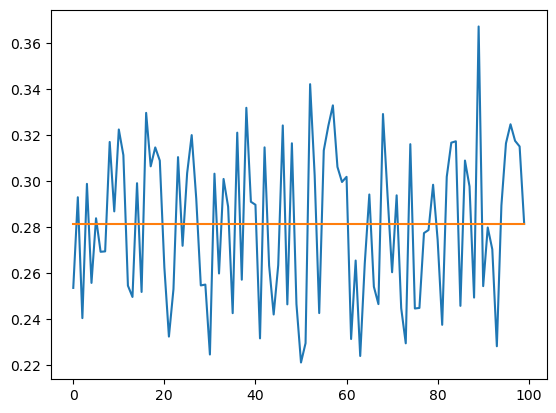

In [381]:
# Fathers
plt.plot(dads)
plt.plot(len(dads)*[np.mean(dads)])
print(np.mean(dads))
plt.show()


0.17562534


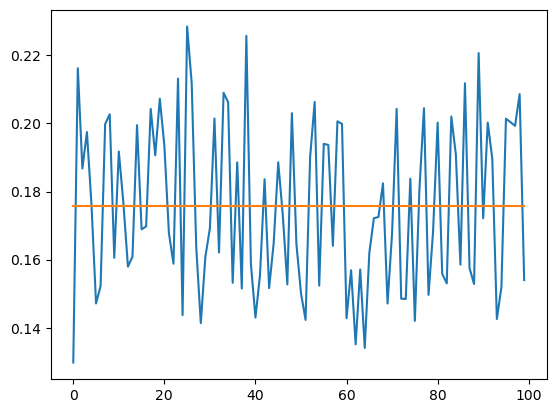

In [383]:
# Mothers
plt.plot(moms)
plt.plot(len(moms)*[np.mean(moms)])
print(np.mean(moms))
plt.show()

#### ---> Thats means: 0.27 * normalazied_fathers + 0.17 * normalazied_mothers

In [385]:
averaged_parents=0.27*X[:,1]+0.17*X[:,2]
# Normalize
max_averaged_parents=max(averaged_parents)
min_averaged_parents=min(averaged_parents)
normalized_averaged_parents=(averaged_parents-min_averaged_parents)/(max_averaged_parents-min_averaged_parents)

In [386]:
new_X=np.concatenate((np.reshape(X[:,0],(934,1)),np.reshape(normalized_averaged_parents,(934,1))),axis=1)
new_X

array([[1, 1.0],
       [0, 1.0],
       [0, 1.0],
       ...,
       [0, 0.14699770316088812],
       [1, 0.04888986109592036],
       [0, 0.04888986109592036]], dtype=object)

In [387]:
avg_X_train, avg_X_test, avg_Y_train, avg_Y_test = train_test_split(new_X, Y, test_size=0.3)

In [388]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = tf.keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(units=1)
])

model.summary()

avg_X_train = np.asarray(avg_X_train).astype('float32')
avg_Y_train = np.asarray(avg_Y_train).astype('float32')
avg_X_test = np.asarray(avg_X_test).astype('float32')
avg_Y_test = np.asarray(avg_Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(avg_X_train, avg_Y_train, epochs=10000, validation_data=(avg_X_test,avg_Y_test), callbacks=[callback])

Model: "sequential_208"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_208 (Dense)                    │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9417 - val_loss: 0.9150
Epoch 2/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8877 - val_loss: 0.8387
Epoch 3/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7957 - val_loss: 0.7672
Epoch 4/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6843 - val_loss: 0.7005
Epoch 5/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6828 - val_loss: 0.6380
Epoch 6/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6257 - val_loss: 0.5805
Epoch 7/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5718 - val_loss: 0.5274
Epoch 8/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5037 - val_loss: 0.4783
Epoch 9/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4584 - val_loss: 0.4329
Epoch 10/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4146 - val_loss: 0.3914
Epoch 11/10000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3669 - val_loss: 0.3531
Epoch 12/10000
21/21 ━━━━━━━━━━━━━━━━━━━━

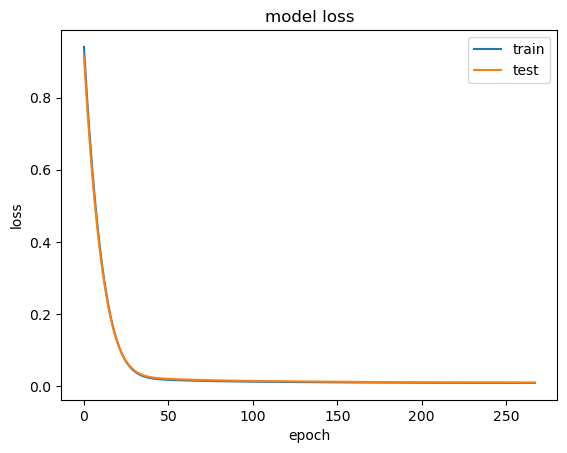

In [389]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


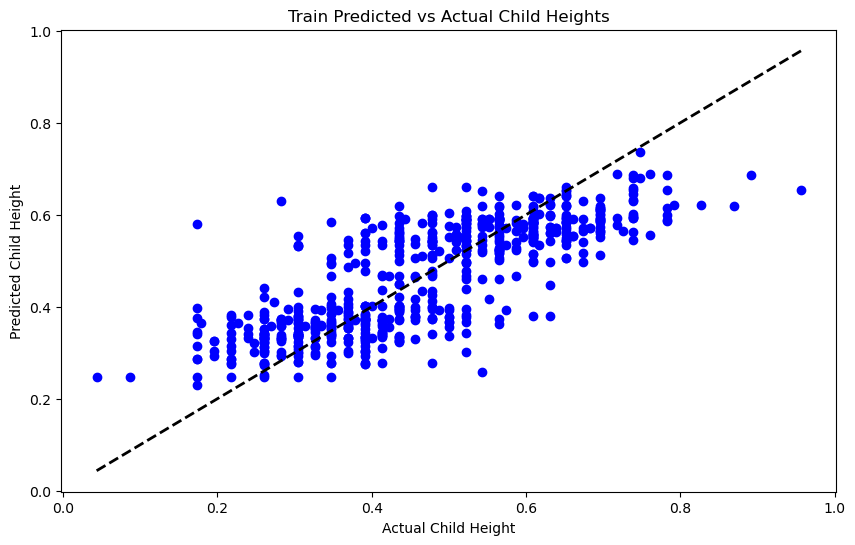

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


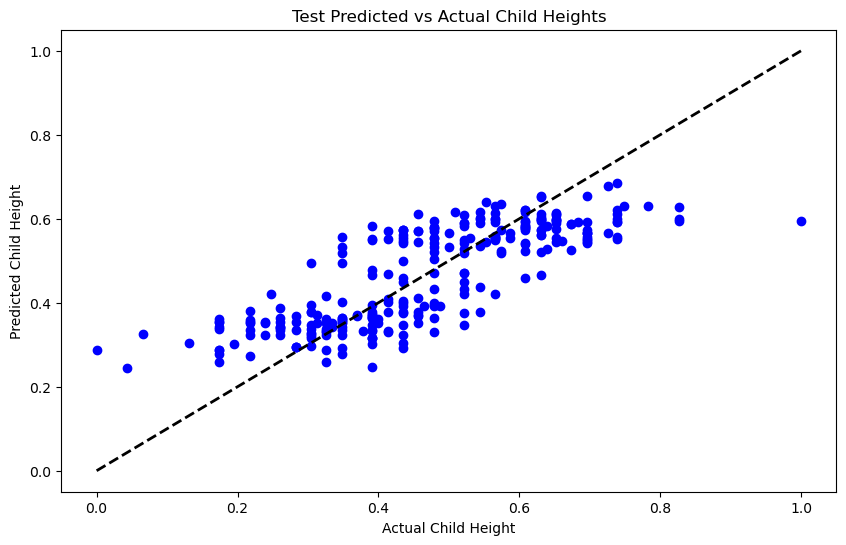

In [390]:
# Plot the predicted vs actual child heights
avg_Y_train_pred=model.predict(avg_X_train)
plt.figure(figsize=(10, 6))
plt.scatter(avg_Y_train, avg_Y_train_pred, color='blue')
plt.plot([avg_Y_train.min(), avg_Y_train.max()], [avg_Y_train.min(), avg_Y_train.max()], 'k--', lw=2)
plt.title('Train Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()
avg_Y_test_pred=model.predict(avg_X_test)
plt.figure(figsize=(10, 6))
plt.scatter(avg_Y_test, avg_Y_test_pred, color='blue')
plt.plot([avg_Y_test.min(), avg_Y_test.max()], [avg_Y_test.min(), avg_Y_test.max()], 'k--', lw=2)
plt.title('Test Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [391]:
# Calculate R2
metric = keras.metrics.R2Score()
metric.update_state(avg_Y_test, model.predict(avg_X_test))
result = metric.result()
result

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.634037>

In [392]:
# corelation between averaged parents and children
corr_coefficient, p_value = stats.pearsonr(np.array(normalized_averaged_parents),np.array(Y))
print("correlation: ", corr_coefficient, "--> with p_value: ", p_value)

correlation:  0.32429206071245553 --> with p_value:  2.5968830697872583e-24


### In families VS all data

#### Global children height distribution

<Axes: xlabel='childHeight', ylabel='Count'>

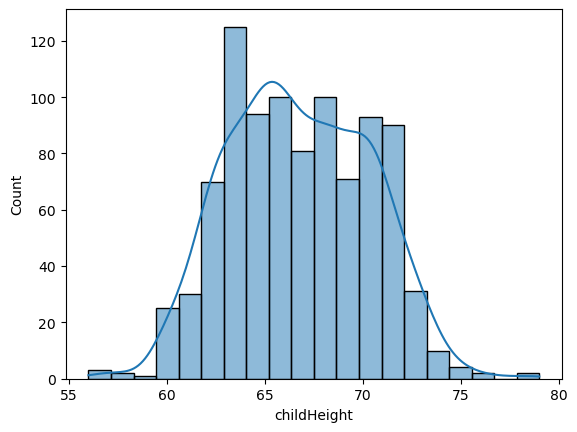

In [395]:
sns.histplot(df,
               x = "childHeight",
               stat = 'count',
               kde = True)

In [396]:
childHeight=np.array(df["childHeight"])

In [397]:
minH=min(childHeight)
maxH=max(childHeight)
meanH=np.mean(childHeight)
stdH=np.std(childHeight)

In [398]:
print("global minimum is: ",minH)
print("global maximum is: ",maxH)
print("global mean is: ",meanH)
print("global std is: ",stdH)
print("global interval is: ",maxH-minH)

global minimum is:  56.0
global maximum is:  79.0
global mean is:  66.74593147751605
global std is:  3.5773346010057634
global interval is:  23.0


#### In families

In [400]:
# correct df
correct_df=df
for i in range(0,609):
    correct_df["family"].iloc[i]=int(correct_df["family"].iloc[i])
for i in range(609,617):
    if correct_df["family"].iloc[i] == "136A":
        correct_df["family"].iloc[i]=136
for i in range(617,934):
    correct_df["family"].iloc[i]=int(correct_df["family"].iloc[i])+1   

C:\Users\User\AppData\Local\Temp\ipykernel_292\3730985834.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  correct_df["family"].iloc[i]=int(correct_df["family"].iloc[i])
C:\Users\User\AppData\Local\Temp\ipykernel_292\3730985834.py:4: Sett

In [401]:
# mapping to families
families=[]
current_family=[]
family_num=1
for i in range(correct_df.shape[0]):
    if correct_df["family"].iloc[i] == family_num:
        current_family.append(correct_df["childHeight"].iloc[i])
    else:
        families.append(current_family)
        family_num+=1
        current_family=[]
        current_family.append(correct_df["childHeight"].iloc[i])
families.append(current_family)      

In [402]:
families

[[73.2, 69.2, 69.0, 69.0],
 [73.5, 72.5, 65.5, 65.5],
 [71.0, 68.0],
 [70.5, 68.5, 67.0, 64.5, 63.0],
 [72.0, 69.0, 68.0, 66.5, 62.5, 62.5],
 [69.5],
 [76.5, 74.0, 73.0, 73.0, 70.5, 64.0],
 [70.5, 68.0, 66.0],
 [66.0],
 [65.5],
 [74.0, 70.0, 68.0, 67.0, 67.0, 66.0, 63.5, 63.0],
 [65.0],
 [71.0, 62.0],
 [68.0, 67.0],
 [71.0, 70.5, 66.7],
 [72.0, 70.5, 70.2, 70.2, 69.2, 68.7, 66.5, 64.5, 63.5],
 [74.0, 73.0, 71.5, 62.5, 66.5, 62.3],
 [66.0, 64.5, 64.0],
 [62.7],
 [73.2, 73.0, 72.7, 70.0, 69.0, 68.5, 68.0, 66.0],
 [73.0, 68.5, 68.0],
 [73.0, 71.0, 67.0],
 [74.2, 70.5, 69.5, 66.0, 65.5, 65.0, 65.0],
 [65.5],
 [66.0, 63.0],
 [70.5, 70.5, 69.0, 65.0, 63.0],
 [69.0, 67.0, 63.0],
 [73.0, 67.0, 70.5, 70.0, 66.5, 63.0],
 [67.5, 67.2, 66.7],
 [64.0],
 [71.0, 70.0, 70.0, 66.0, 65.0, 65.0],
 [74.0, 72.0, 69.0, 67.5, 63.5],
 [72.0, 71.5, 71.5, 70.0, 68.0],
 [65.7],
 [78.0, 74.0, 73.0, 72.0, 67.0],
 [73.2, 73.0, 69.0, 67.0],
 [70.0, 67.0, 67.0, 66.5],
 [70.0, 69.0, 68.5, 66.0, 64.5, 63.0],
 [71.0, 67

#### Families intervals distribution (calculate: max child - min child, in each family)

In [404]:
intervals=[]
for family in families:
    if max(family)-min(family)>0:
        intervals.append(max(family)-min(family))

In [405]:
min(intervals)

0.7999999999999972

<Axes: ylabel='Count'>

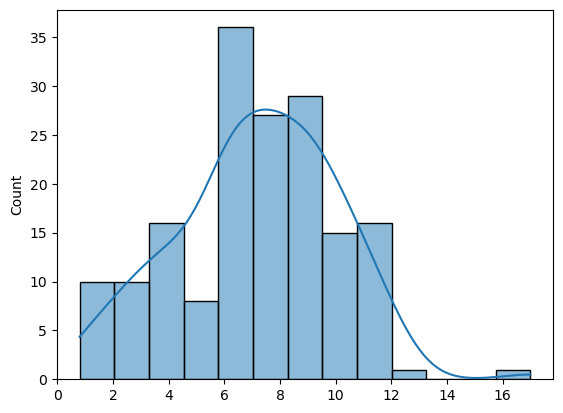

In [406]:
sns.histplot(intervals,stat = 'count', kde = True)

In [407]:
check_normality(intervals)

p value:0.2415
Fail to reject null hypothesis >> The data is normally distributed


#### The std in each family - distriburion through the families

In [409]:
stds=[]
for family in families:
    if len(family)>1:
        stds.append(np.std(family))

<Axes: ylabel='Count'>

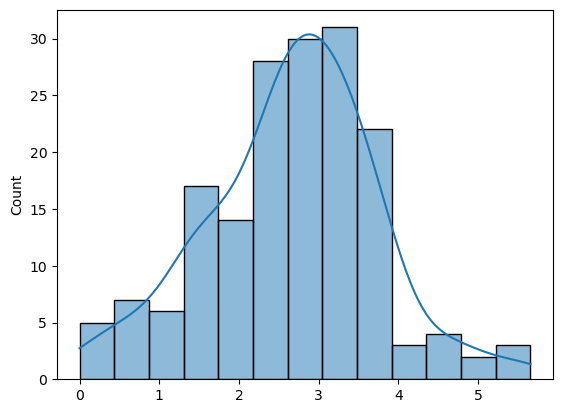

In [410]:
sns.histplot(stds,stat = 'count', kde = True)

In [411]:
check_normality(stds)

p value:0.1565
Fail to reject null hypothesis >> The data is normally distributed


#### Distribution of the mean heights of the families

In [413]:
means=[]
for family in families:
    means.append(np.mean(family))

<Axes: ylabel='Count'>

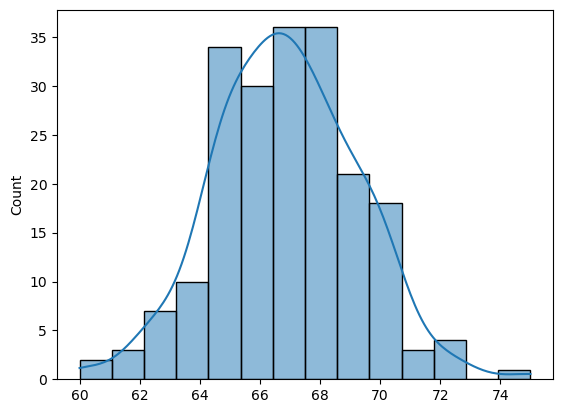

In [414]:
sns.histplot(means,stat = 'count', kde = True)

In [533]:
check_normality(means)

p value:0.8647
Fail to reject null hypothesis >> The data is normally distributed
